In [1]:
# Preliminary Data Extraction

# Import libraries
from msc_code.scripts.notebook_setup import *

Notebook setup complete.


In [2]:
# Define input path
ip = "/".join([RAW_DATA_DIR, "data_extraction"])

# Define output path
op = "/".join([PROC_DATA_DIR, "data_extraction"])

# Define case data path
case_data_path = os.path.join(ip, "case_report_data_extraction_end.xlsx")
paper_data_path = os.path.join(ip, "data_extraction_end.xlsx")

# Define output path8
output_path = os.path.join(OUTPUT_DIR, "reports", "data_extraction")

# Define figures path
figures_path = os.path.join(OUTPUT_DIR, "reports", "data_extraction", "figures")

# Define tables_folder
tables_folder = os.path.join(OUTPUT_DIR, "reports", "data_extraction", "tables")

In [3]:
# Import case data
case_df = pd.read_excel(case_data_path)
# Import paper data
paper_df = pd.read_excel(paper_data_path)

In [4]:
# Filter out Study_ID == 3
# case_df = case_df[case_df['Study_ID'] != 3]
# paper_df = paper_df[paper_df['Study_ID'] != 3]

## Paper Data

In [5]:
paper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Study_ID               96 non-null     int64  
 1   First_Author           94 non-null     object 
 2   Publication_Year       96 non-null     int64  
 3   Title                  96 non-null     object 
 4   Study_Design           86 non-null     object 
 5   Population_Type        16 non-null     object 
 6   Study_Setting          89 non-null     object 
 7   Study_Location         91 non-null     object 
 8   DOI                    94 non-null     object 
 9   Data_Extracted         96 non-null     object 
 10  Bibliography_Searched  96 non-null     object 
 11  Exclude                0 non-null      float64
 12  Notes                  1 non-null      object 
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ KB


In [6]:
# Filter out papers where data extraction not complete
# paper_df = paper_df[paper_df['Data_Extracted'] == 'Y']

paper_df.head()

Study_ID      First_Author  Publication_Year  \
0         3  Richardson, M.H.              1886   
1        39      Tanigawa, K.              1993   
2        46  O'Sullivan, S.T.              1996   
3        51    Losanoff, J.E.              1996   
4        54    Losanoff, J.E.              1997   

                                               Title Study_Design  \
0  A Case Of Gastrotomy. Digital Exploration Of S...  Case Series   
1  Endoscopic Removal Of Foreign Bodies In The Me...  Case Report   
2  Deliberate Ingestion Of Foreign Bodies By Inst...  Case Series   
3  Gastrointestinal 'Crosses'. A New Shade From A...  Case Series   
4       Oesophageal "Cross"--A Sinister Foreign Body  Case Report   

                                   Population_Type  \
0                                              NaN   
1                                              NaN   
2  Mixed Prisoner Psychiatric Inpatient Population   
3                                              NaN   
4                                              NaN   

                                       Study_Setting         Study_Location  \
0                                         Historical                    USA   
1                                                NaN                  Japan   
2  Department of Plastic & Reconstructive Surgery...  Wilton, Cork, Ireland   
3                    University Hospital in Bulgaria               Bulgaria   
4                    University Hospital in Bulgaria               Bulgaria   

                                    DOI Data_Extracted Bibliography_Searched  \
0           10.1056/NEJM188612161152403              Y                     N   
1                                   NaN              Y                     N   
2                    10.1007/bf02943095              Y                     N   
3  10.1001/archsurg.1996.01430140056015              Y                     N   
4                   10.1136/emj.14.1.54              Y                     N   

   Exclude Notes  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN

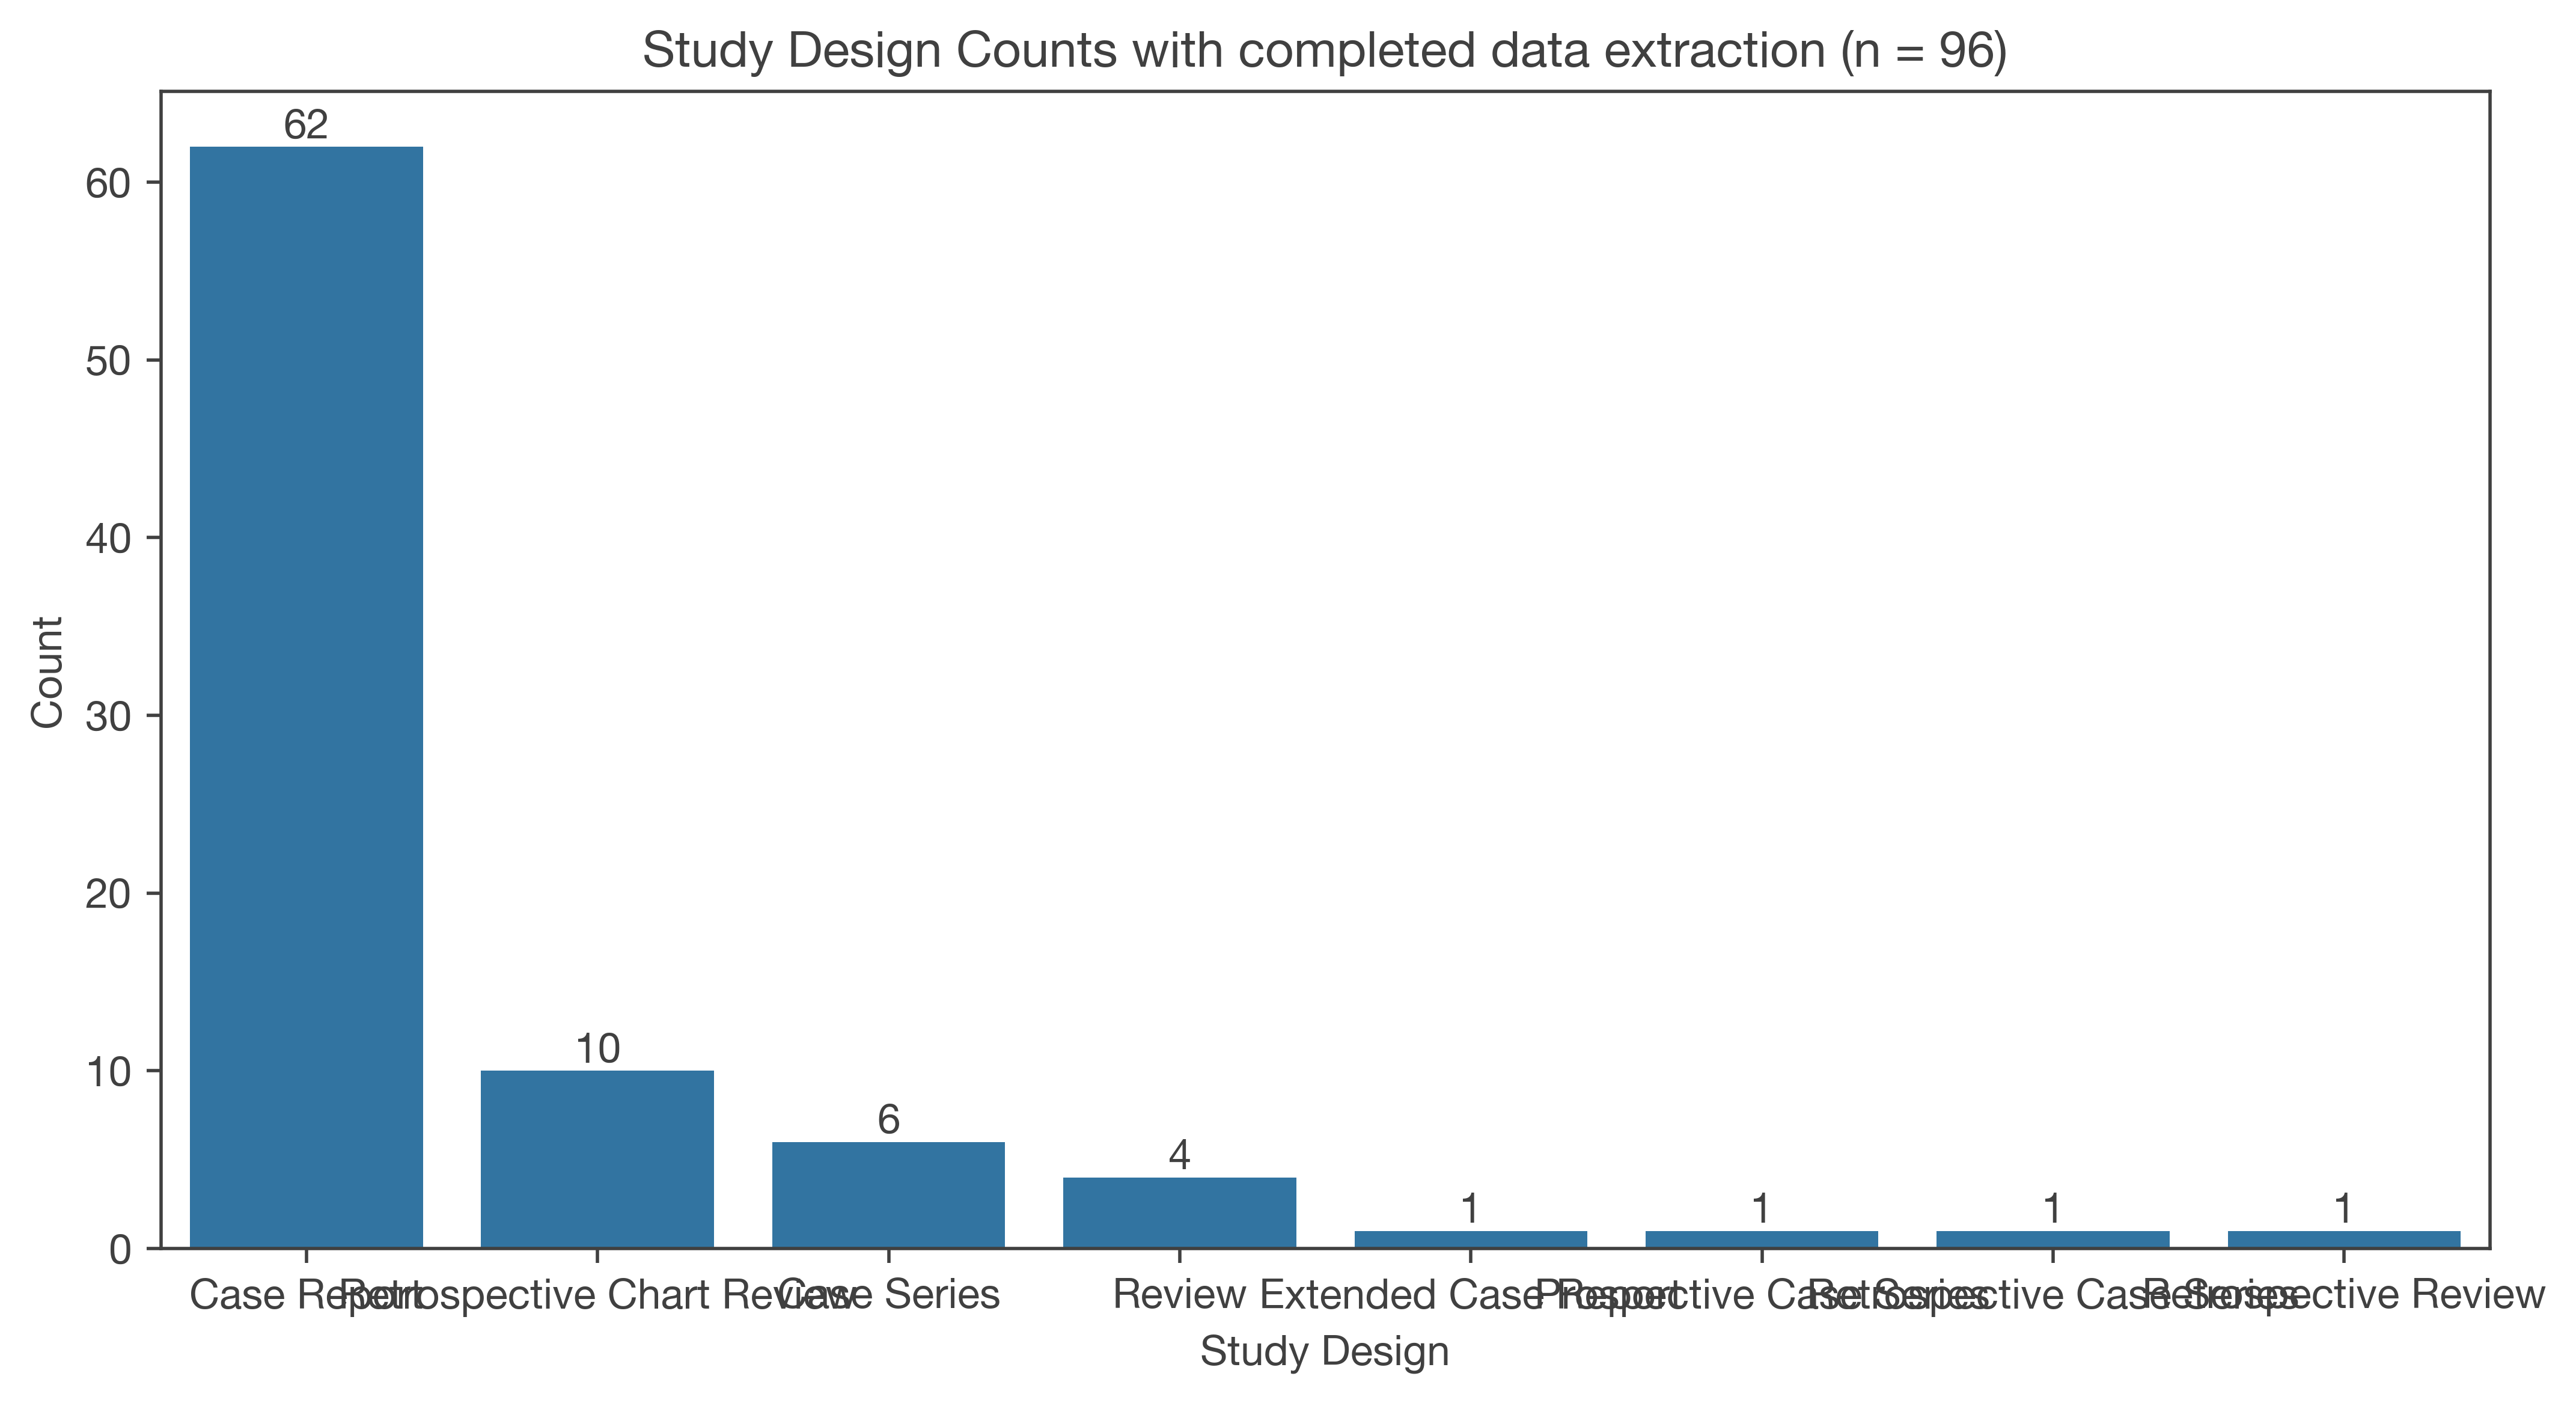

In [7]:
plot_data = paper_df['Study_Design'].value_counts().reset_index()
plot_data.columns = ['Study Design', 'Count']

plt.figure(figsize=(10,5))
ax = sns.barplot(data=plot_data,
                 x='Study Design',
                 y='Count')

# Set title and labels
ax.set(title=f'Study Design Counts with completed data extraction (n = {len(paper_df)})', xlabel='Study Design', ylabel='Count')

# Add labels to the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
    
plot_path = os.path.join(figures_path, "study_design_plot.png")
plt.savefig(plot_path)
plt.show()
plt.close()


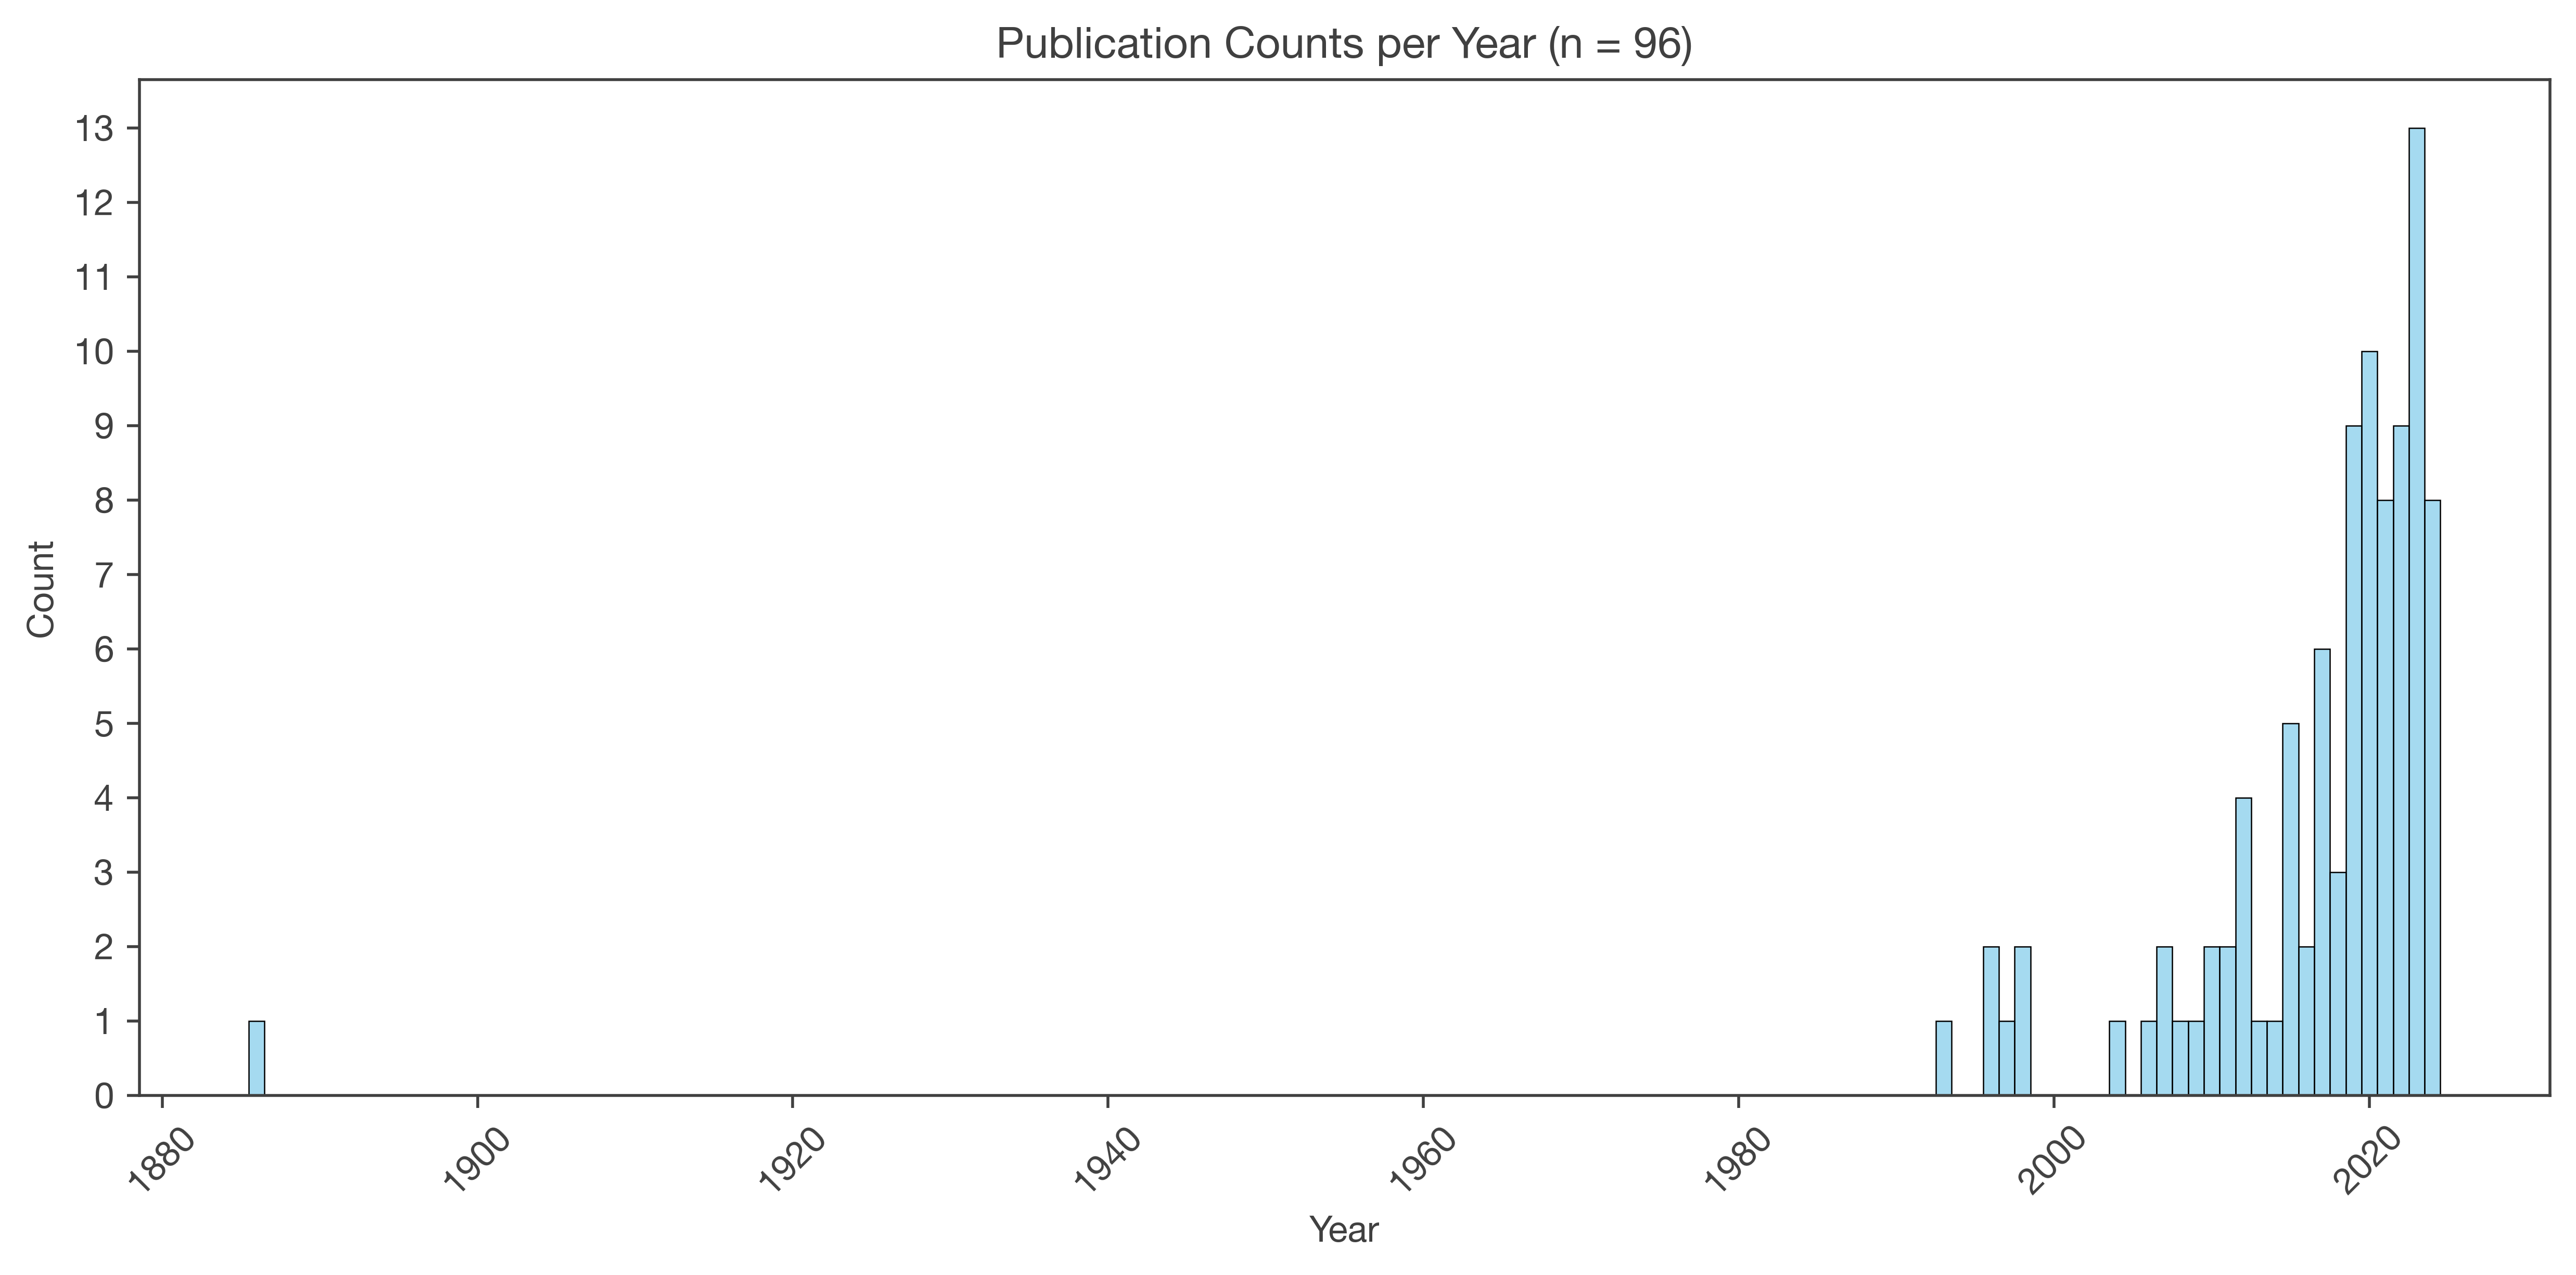

In [8]:
plot_data = paper_df.copy()

plt.figure(figsize=(10,5))
ax = sns.histplot(
    data=plot_data,
    x='Publication_Year',
    bins='auto',
    color='skyblue',
    discrete=True
)

# Set y-axis ticks to increment by 1
y_max = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, int(y_max) + 1, 1))

# Titles and labels
ax.set(title=f'Publication Counts per Year (n = {len(paper_df)})')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-ticks if needed for readability
plt.tight_layout()
plot_path = "/".join([figures_path, "publications_per_year_plot.png"])
plt.savefig(plot_path)
plt.show()


In [9]:
case_df['Study_ID'] = case_df['Study_ID'].astype('int')

# Patient_ID
case_df['Patient_ID'] = case_df['Patient_ID'].astype('str')
# Check Patient_ID is unique
print(f"All Patient_ID's are unique?: {case_df['Patient_ID'].is_unique}")

# Create dataframe of duplicate patient Ids
duplicates = case_df[case_df['Patient_ID'].duplicated(keep=False)]
print(duplicates)

All Patient_ID's are unique?: True
Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Other, Outcome_Other_Long, Comments]
Index: []

[0 rows x 35 columns]


In [10]:
# Calculate number of cases per paper
case_counts = case_df.groupby('Study_ID')['Patient_ID'].count()

# Map to paper_data, creating 'Case_Count' column
paper_df['Case_Count'] = paper_df['Study_ID'].map(case_counts)

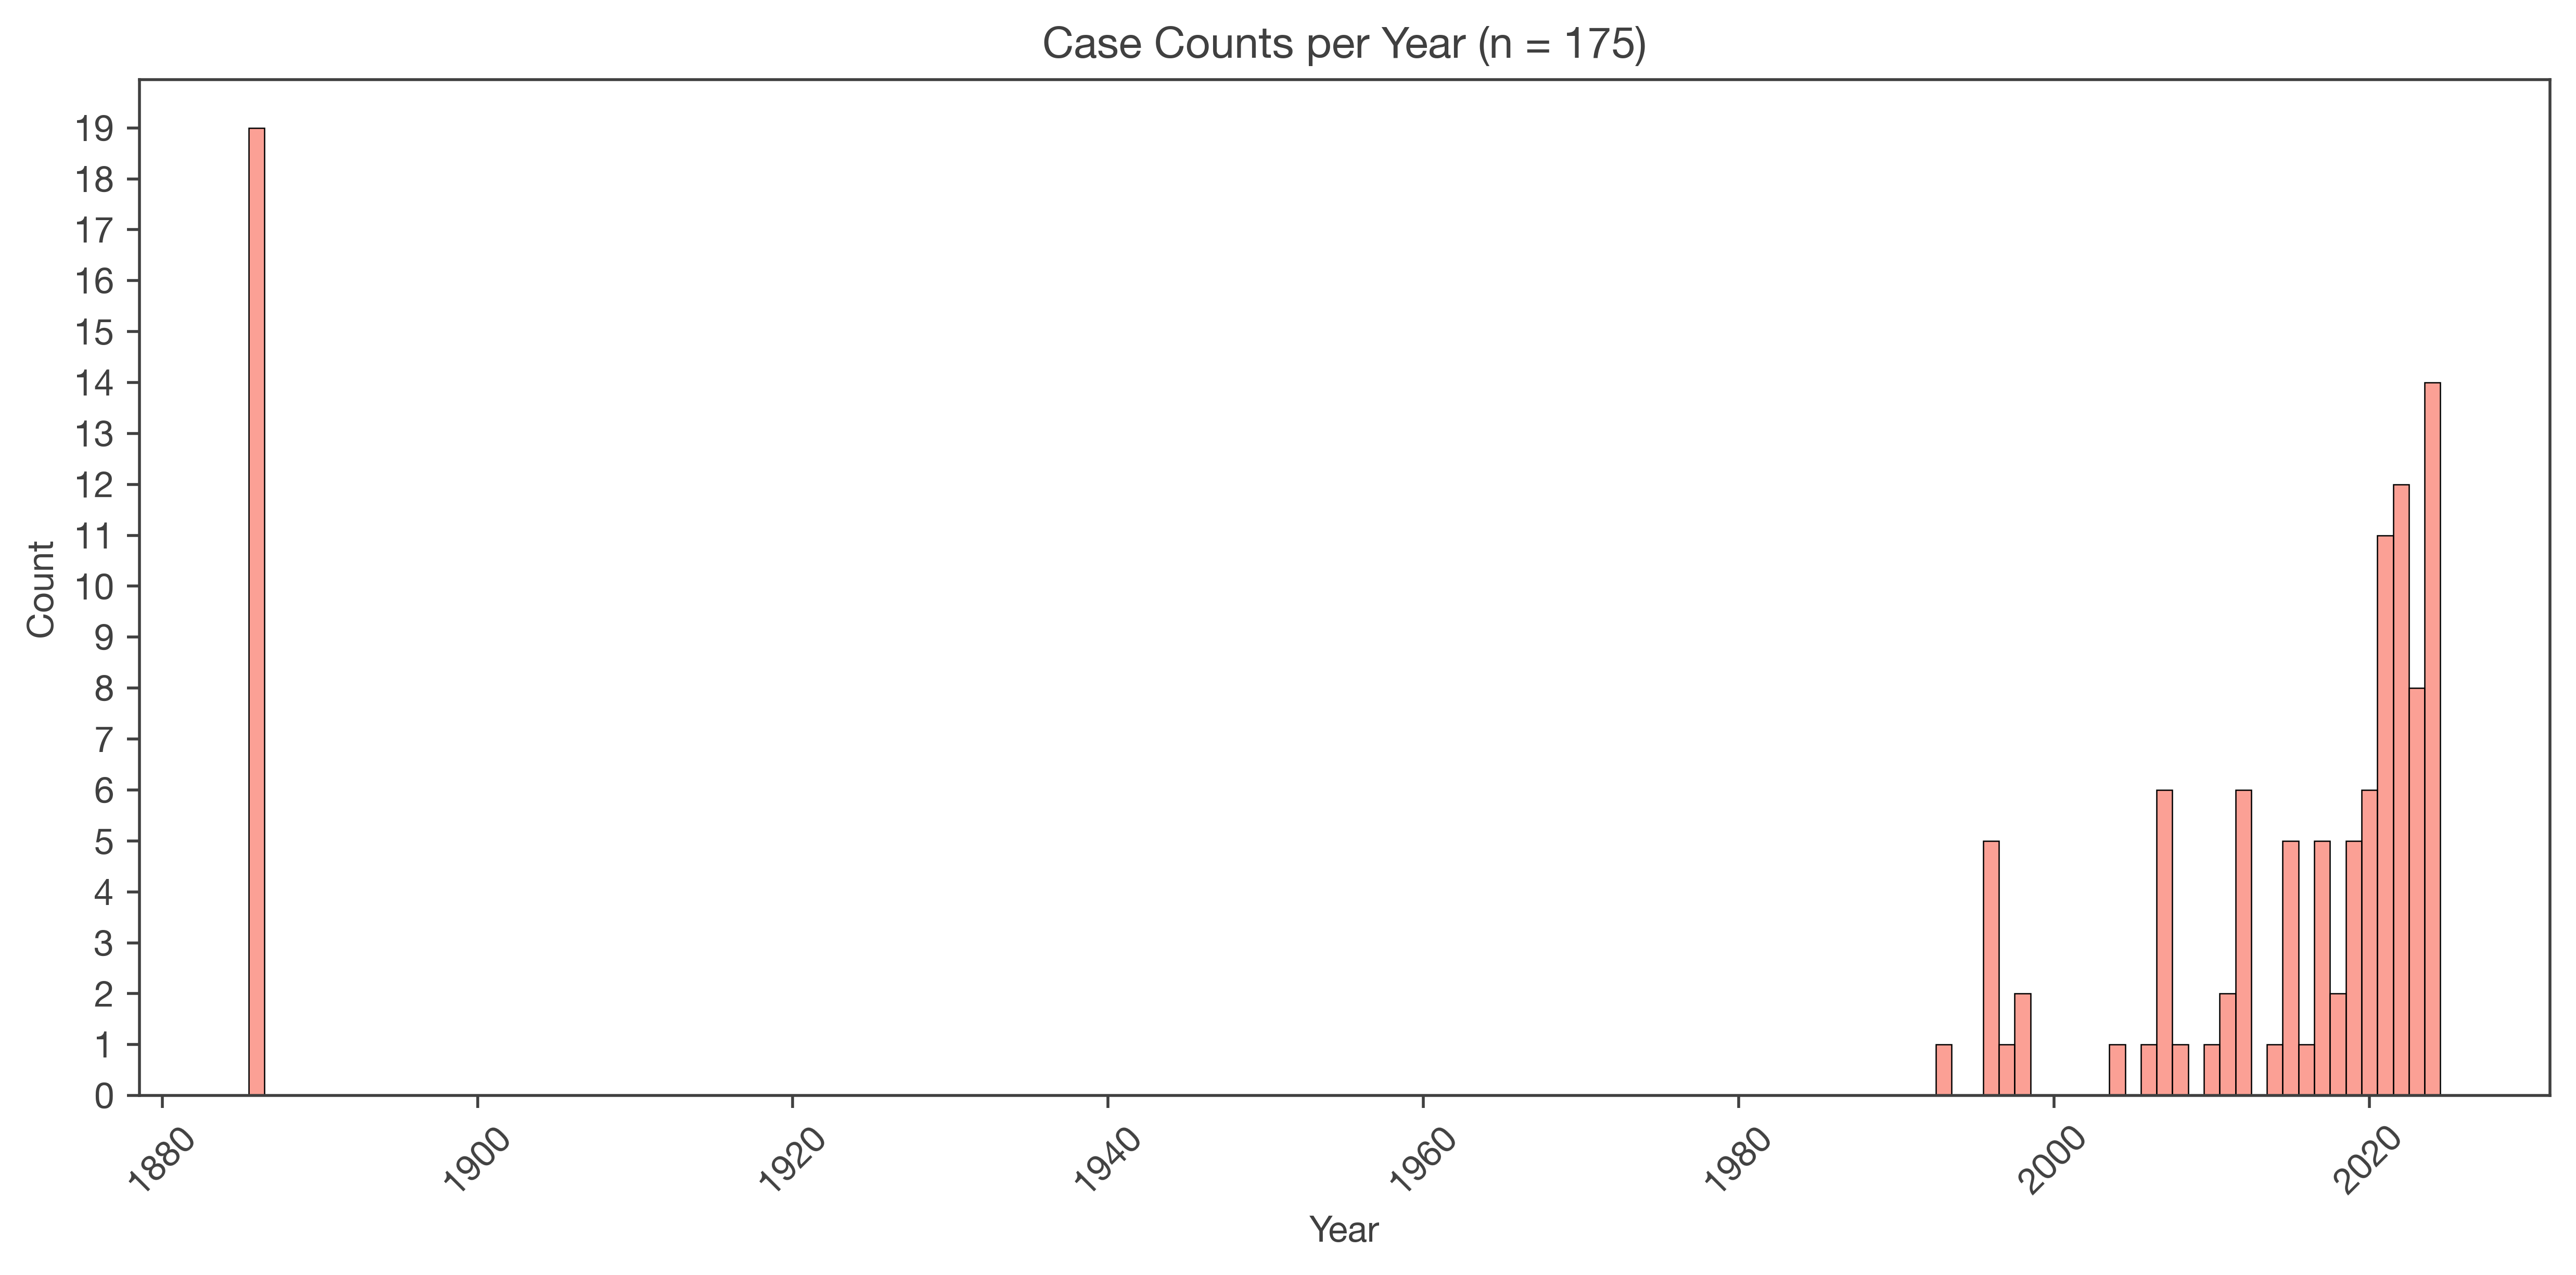

In [11]:
# Filter only extracted papers
plot_data = paper_df.copy()

# Plot histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    data=plot_data,
    x='Publication_Year',
    weights='Case_Count',
    bins='auto',  # Let Seaborn automatically determine the bins
    color='salmon',
    discrete=True
)

# Set y-axis ticks to increment by 1
y_max = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, int(y_max) + 1, 1))

# Titles and labels
ax.set(title=f'Case Counts per Year (n = {len(case_df)})')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-ticks if needed for readability
plt.tight_layout()
plot_path = "/".join([figures_path, "cases_per_year_plot.png"])
plt.savefig(plot_path)
plt.show()

## Case Data

In [12]:
# View case_df column headers.
case_df.columns

Index(['Study_ID', 'Patient_ID', 'Age_Yrs', 'Gender', 'Is_Intentional',
       'Is_Prisoner', 'Is_Psych_Inpat', 'Is_Displaced_Person',
       'Under_Influence_Alcohol', 'Psych_Hx', 'Severe_Disability_Hx',
       'Previous_Ingestions', 'Motivation_Intent_To_Harm',
       'Motivation_Protest', 'Motivation_Psychiatric',
       'Motivation_Psychosocial', 'Motivation_Unknown', 'Motivation_Other',
       'Motivation_Other_Long', 'Object_Button_Battery', 'Object_Magnet',
       'Object_Long', 'Object_Diameter_Large', 'Object_Sharp',
       'Object_Multiple', 'Object_Other_Long', 'Outcome_Endoscopy',
       'Outcome_Surgery', 'Outcome_Death',
       'Outcome_Injury_Needing_Intervention', 'Outcome_Perforation',
       'Outcome_Obstruction', 'Outcome_Other', 'Outcome_Other_Long',
       'Comments'],
      dtype='object')

In [13]:
# Create additional columns 
case_df['Object_Long_Sharp'] = case_df.apply(
    lambda row: 'Y' if row['Object_Long'] == 'Y' and row['Object_Sharp'] == 'Y' else 'N',
    axis=1
)

# Create Object_Short
case_df['Object_Short'] = case_df.apply(
    lambda row: 'Y' if row['Object_Long'] == 'N' else 'N',
    axis=1
)

# Create Object_Short_Sharp
case_df['Object_Short_Sharp'] = case_df.apply(
    lambda row: 'Y' if row['Object_Short'] == 'Y' and row['Object_Sharp'] == 'Y' else 'N',
    axis=1
)

# Create additional columns 
case_df['Outcome_Conservative'] = case_df.apply(
    lambda row: 'Y' if row['Outcome_Surgery'] != 'Y' and row['Outcome_Endoscopy'] != 'Y' else 'N',
    axis=1
)
# Create Outcome Endoscopy_Surgery Column
case_df['Outcome_Endoscopy_Surgery'] = case_df.apply(
    lambda row: 'Y' if row['Outcome_Surgery'] == 'Y' and row['Outcome_Endoscopy'] == 'Y' else 'N',
    axis=1
)

# Create Motivation_Other_Psych_Hx
# Create additional columns 
case_df['Motivation_Other_Psych_Hx'] = case_df.apply(
    lambda row: 'Y' if row['Motivation_Other'] == 'Y' and row['Psych_Hx'] == 'Y' else 'N',
    axis=1
)

# Create Motivation_Other_Severe_Disability_Hx
case_df['Motivation_Other_Severe_Disability_Hx'] = case_df.apply(
    lambda row: 'Y' if row['Motivation_Other'] == 'Y' and row['Severe_Disability_Hx'] == 'Y' else 'N',
    axis=1
)


In [14]:
# motivation_count_cols = ['Motivation_Intent_To_Harm',
# 'Motivation_Protest',
# 'Motivation_Psychiatric',
# 'Motivation_Other',
# 'Motivation_Other_Psych_Hx',
# 'Motivation_Psychosocial']

# Count each 1 in each motivation_count column, excluding Motivation_Unknown
# case_df['Motivation_Count'] = case_df[motivation_count_cols].sum(axis=1)

In [15]:
# Free text cols
free_text_cols = ['Comments', 'Motivation_Other_Long', 'Object_Other_Long', 'Outcome_Other_Long']


# Define age_gender cols
age_gender_cols = ['Age_Yrs', 'Gender']

# Define Population Variable cols
population_cols = ['Is_Prisoner', 'Is_Psych_Inpat', 
                   'Is_Displaced_Person', 'Under_Influence_Alcohol', 'Psych_Hx', 
                   'Severe_Disability_Hx', 'Previous_Ingestions']

# Define motivation varibale cols
motivation_cols = [col for col in case_df.columns if 'Motivation' in col and col not in free_text_cols]

# Define object variable cols
object_cols = [col for col in case_df.columns if 'Object' in col and col not in free_text_cols]

# Define outcome variable cols
outcome_cols = [col for col in case_df.columns if 'Outcome' in col and col not in free_text_cols]

# Non-binary cols
non_binary_cols = [
    'Study_ID',
    'Patient_ID',
    'Age_Yrs',
    'Gender',
    'Comments',
    'Motivation_Other_Long',
    'Object_Other_Long',
    'Outcome_Other_Long'
]

binary_cols = [
    col for col in population_cols + motivation_cols + object_cols + outcome_cols
    if col not in free_text_cols
]

# Convert 'Y', 'N' and 'UK' values to binary for better data handling. Leave 'UK' as blank.
# Define the mapping dictionary
binary_map = {'Y': 1, 'N': 0, 'UK': 0}

# Apply to all binary columns
case_df[binary_cols] = case_df[binary_cols].applymap(lambda x: binary_map.get(x, np.nan))

/var/folders/s8/_px9wcjn5tlgw4wb39b3975m0000gn/T/ipykernel_6467/786128210.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  case_df[binary_cols] = case_df[binary_cols].applymap(lambda x: binary_map.get(x, np.nan))


In [16]:
# Convert Study_ID to string.
case_df['Study_ID'] = case_df['Study_ID'].astype(str)

# Convert Patient_ID to string.
case_df['Study_ID'] = case_df['Study_ID'].astype(str)

# Handle UK values in Age_Yrs.
case_df['Age_Yrs'] = case_df['Age_Yrs'].replace('UK', np.nan).astype(float)

# Handle UK values in Gender and convert to categorical variable
case_df['Gender'] = case_df['Gender'].replace('UK', 'Unknown').astype('category')

/var/folders/s8/_px9wcjn5tlgw4wb39b3975m0000gn/T/ipykernel_6467/357481098.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  case_df['Age_Yrs'] = case_df['Age_Yrs'].replace('UK', np.nan).astype(float)


In [17]:
# Create age summary
age_summary = case_df['Age_Yrs'].describe().reset_index()
age_summary.columns = ['Statistic', 'Age (Years)']

age_summary['Statistic'] = age_summary['Statistic'].str.capitalize()

latex_table = age_summary.to_latex(
    index=False,
    caption=None,
    label=None,
    float_format="%.1f",
    escape=True
)

# Wrap with a properly centered LaTeX table block
latex_wrapped = f"""
\\begin{{table}}[H]
\\centering
\\caption{{Summary statistics for age in years.}}
\\label{{tab:age-summary}}
{latex_table}
\\end{{table}}
\\FloatBarrier
"""

# Write to file
table_path = os.path.join(tables_folder, "age_summary.tex")
with open(table_path, "w") as f:
    f.write(latex_wrapped)


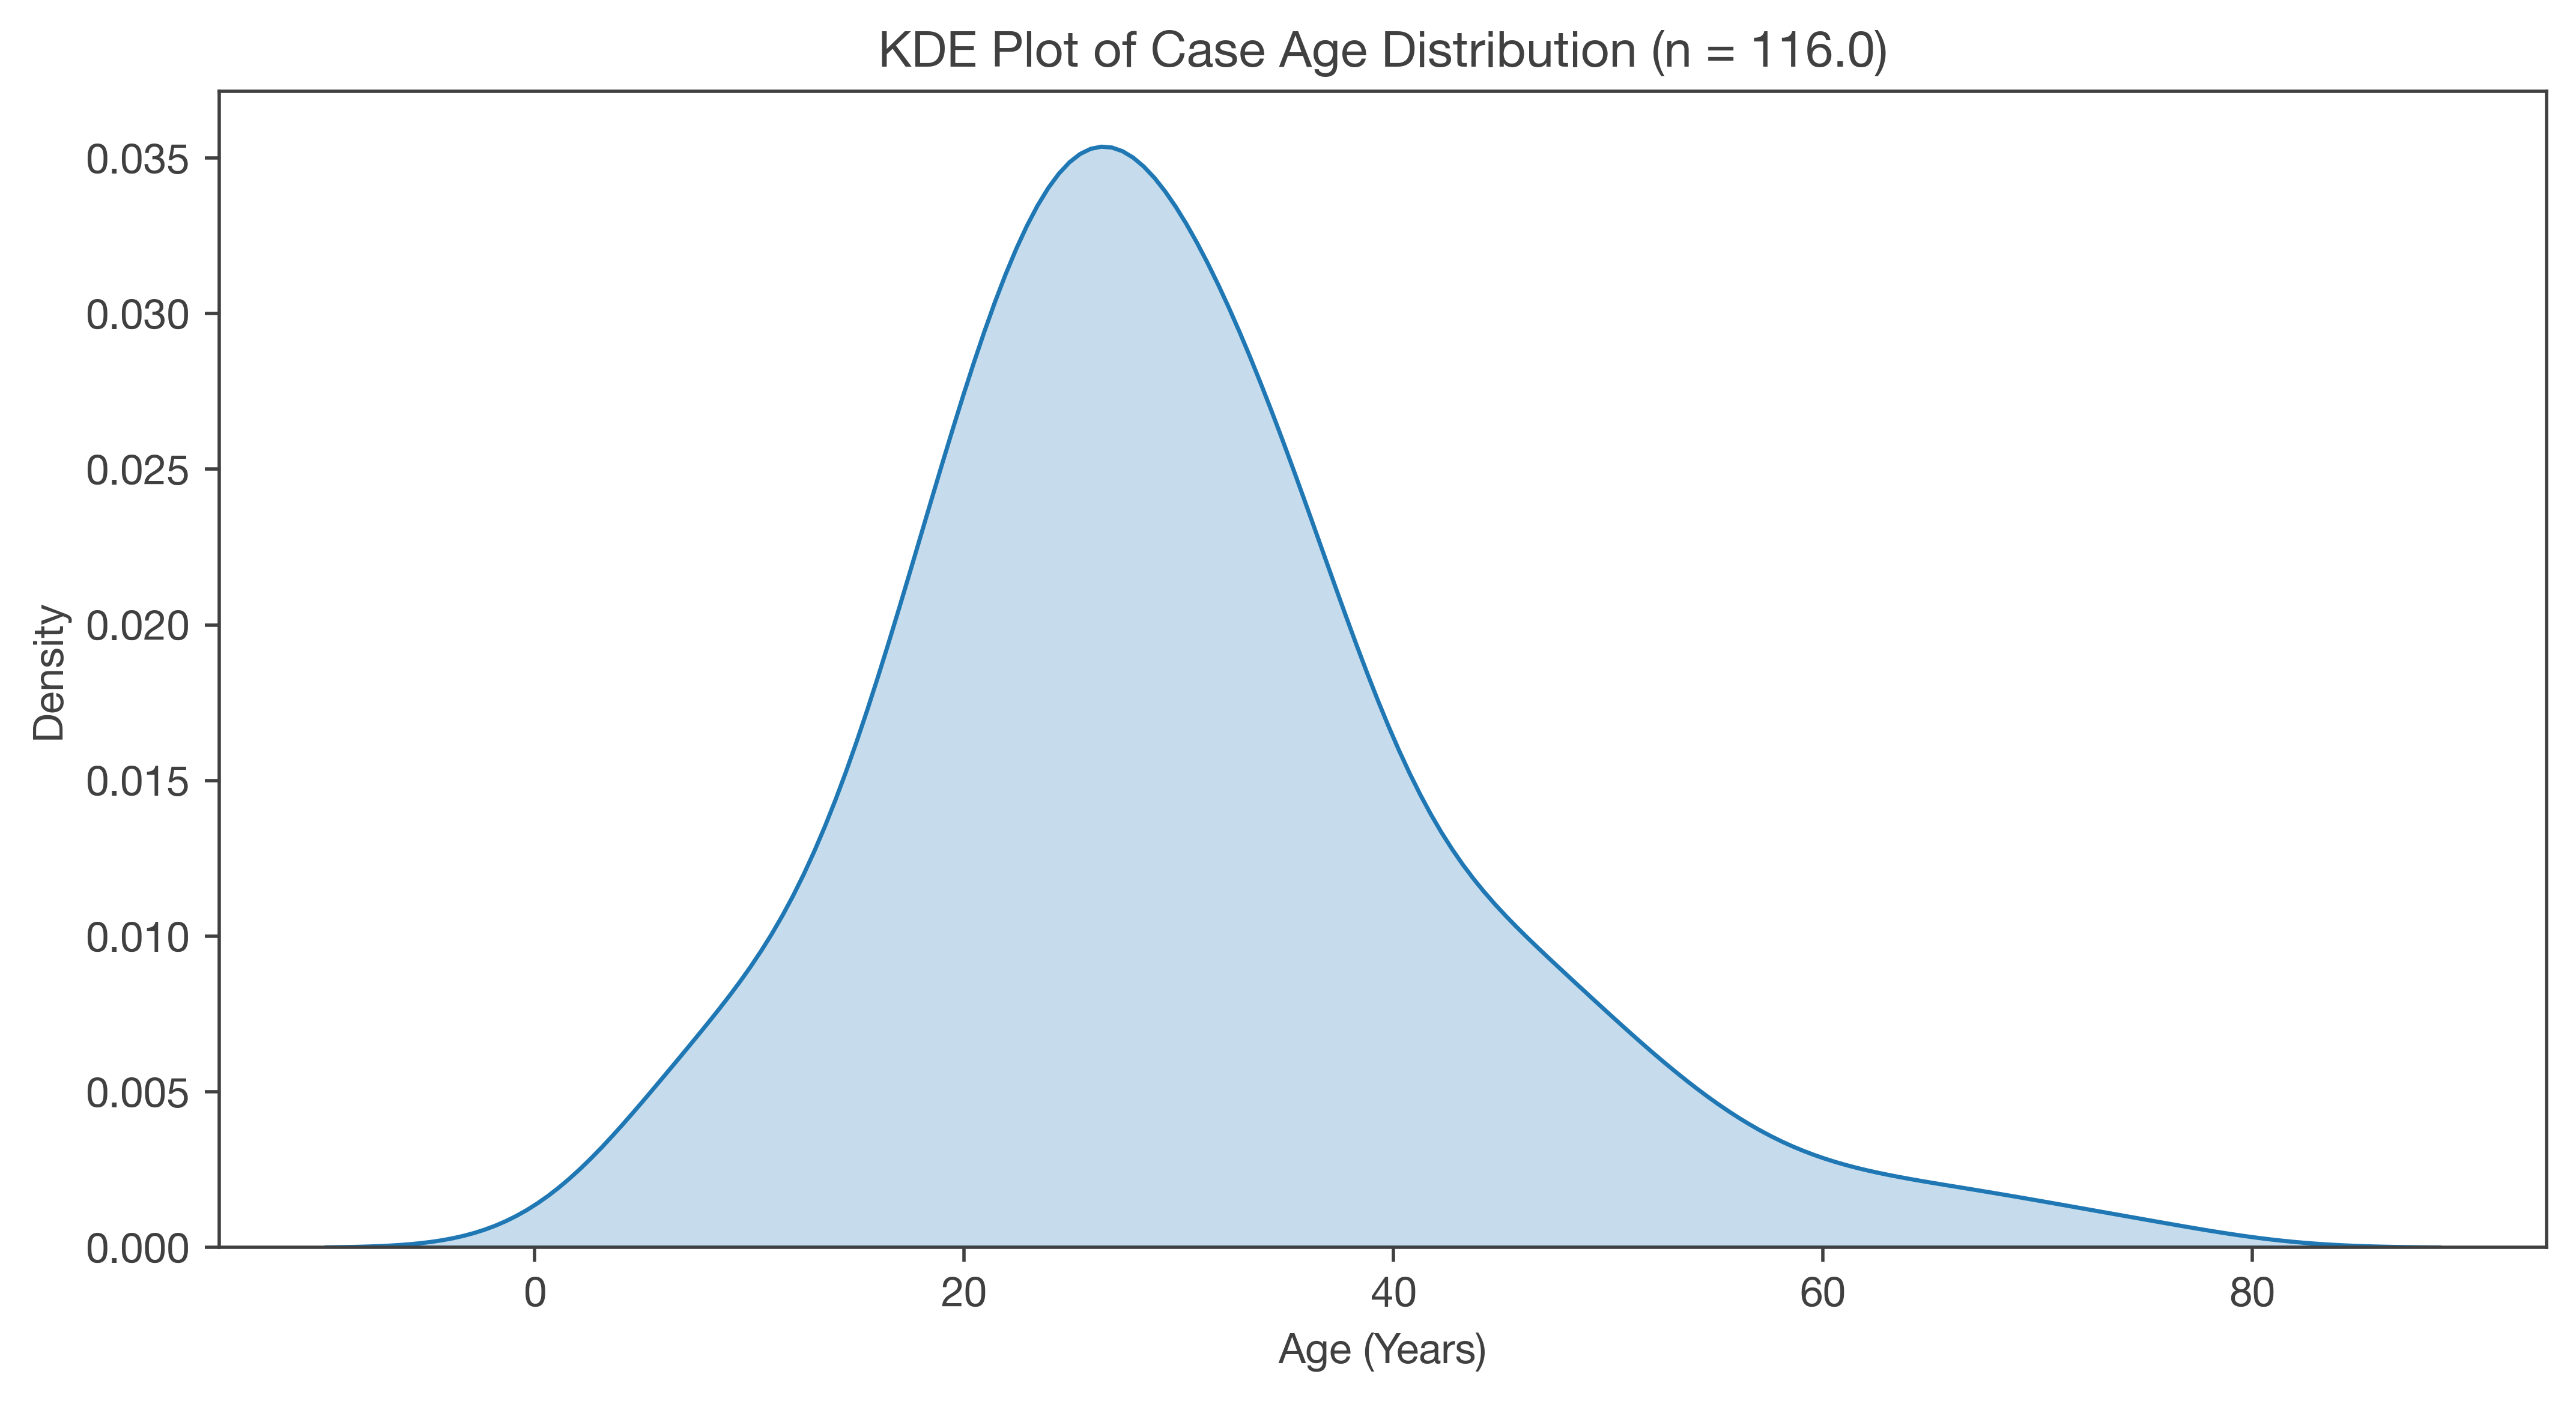

In [18]:
plot_data = case_df['Age_Yrs']

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data=plot_data,
                 fill=True)

ax.set(title=f"KDE Plot of Case Age Distribution (n = {paper_df['Case_Count'].sum()})",
       xlabel='Age (Years)')

plot_path = os.path.join(figures_path, "kde_age_plot.png")
plt.savefig(plot_path)
plt.show()
plt.close()

In [19]:
gender_summary = case_df['Gender'].value_counts().reset_index()
gender_summary.columns = ['Gender', 'Count (N)']

gender_summary['Percentage (%)'] = (gender_summary['Count (N)'] / gender_summary['Count (N)'].sum() * 100)

latex_table = gender_summary.to_latex(
    index=False,
    caption=None,
    label=None,
    float_format="%.1f",
    escape=True
)

# Wrap with a properly centered LaTeX table block
latex_wrapped = f"""
\\begin{{table}}[H]
\\centering
\\caption{{Counts and percentages of 1s in Gender Column (sorted descending)}}
\\label{{tab:gender-summary}}
{latex_table}
\\end{{table}}
\\FloatBarrier
"""

# Write to file
table_path = os.path.join(tables_folder, "gender_summary.tex")
with open(table_path, "w") as f:
    f.write(latex_wrapped)

gender_summary

Gender  Count (N)  Percentage (%)
0     Male        119       68.000000
1   Female         48       27.428571
2  Unknown          8        4.571429

In [20]:
import textwrap

# Define column groups
table_groups = {
    "population_summary": population_cols,
    "motivation_summary": motivation_cols,
    "object_summary": object_cols,
    "outcome_summary": outcome_cols,
}

# Output folder
tables_folder = os.path.join(output_path, "tables")
os.makedirs(tables_folder, exist_ok=True)

for name, cols in table_groups.items():
    df = case_df[cols].copy()

    # Count valid (non-NaN) values per column
    valid_n = df.notna().sum()

    # Count number of 1s per column (after dropping NaNs)
    counts = df.apply(lambda x: (x.dropna() == 1).sum())

    # Calculate percentages
    percentages = (counts / valid_n * 100).round(1)

    # Combine into summary table
    summary = pd.DataFrame({
        'Count (1s)': counts,
        'Valid N': valid_n,
        'Percentage (%)': percentages
    })

    # Clean variable names
    summary.index = summary.index.str.replace('_', ' ')

    # Sort by percentage descending
    summary = summary.sort_values(by='Percentage (%)', ascending=False)

    # Convert DataFrame to LaTeX tabular (no full table wrapper)
    latex_tabular = summary.to_latex(
        index=True,
        caption=None,
        label=None,
        float_format="%.1f",
        escape=True
    )

    # Remove any accidental caption or label
    latex_tabular = "\n".join(
        line for line in latex_tabular.splitlines()
        if not line.strip().startswith("\\caption") and not line.strip().startswith("\\label")
    )

    # Wrap full LaTeX table manually
    latex_full_table = textwrap.dedent(f"""\
        \\begin{{table}}[H]
        \\centering
        \\caption{{Counts and percentages of 1s for {name.replace('_', ' ')} (sorted descending by percentage).}}
        {latex_tabular}
        \\label{{tab:{name}}}
        \\end{{table}}
        \\FloatBarrier
    """)

    # Strip leading/trailing blank lines
    latex_full_table = latex_full_table.strip()

    # Write to file
    table_path = os.path.join(tables_folder, f"{name}.tex")
    with open(table_path, "w") as f:
        f.write(latex_full_table)

    print(f"✅ Wrote: {table_path}")

✅ Wrote: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/population_summary.tex
✅ Wrote: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/motivation_summary.tex
✅ Wrote: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/object_summary.tex
✅ Wrote: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/outcome_summary.tex


In [21]:
# Filter the DataFrame for relevant rows
table_data = case_df[case_df['Motivation_Other'] == 1]

# Select and reset index
motivation_other_long_df = table_data[['Patient_ID', 'Motivation_Other_Long']].reset_index(drop=True)

# Path to save the table
table_path = os.path.join(tables_folder, "motivation_other_long_table.tex")

# Generate LaTeX table string with fixed-width columns
latex_table = motivation_other_long_df.to_latex(
    index=False,
    caption=None,
    label=None,
    column_format='p{3cm}p{12cm}',  # Set column widths for wrapping
    escape=True
)

# Extract header and content from LaTeX table string
table_lines = latex_table.splitlines()
table_header = "Patient\\ ID & Free Text Motivation\\\\"  # The column headers
table_content = "\n".join(table_lines[4:-2])  # The table rows (skip top and bottom lines)

# Wrap in LaTeX table environment with better formatting
latex_wrapped = f"""
\\begin{{table}}[H]
\\centering
\\renewcommand{{\\arraystretch}}{{1.2}}
\\caption{{List of comments made during data extraction in Motivation\\_Other\\_Long where Motivation\\_Other marked 'Y'.}}
\\label{{tab:motivation-other-summary}}
\\begin{{tabular}}{{p{{3cm}}p{{12cm}}}}
\\toprule
{table_header}
\\midrule
{table_content}
\\bottomrule
\\end{{tabular}}
\\end{{table}}
\\FloatBarrier
"""

# Save the LaTeX file
with open(table_path, "w") as f:
    f.write(latex_wrapped)

print(f"✅ Wrote: {table_path}")

# Show the DataFrame as confirmation
motivation_other_long_df

✅ Wrote: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/motivation_other_long_table.tex


Patient_ID                              Motivation_Other_Long
0      3-012                                   Delirium Tremens
1      3-014            Cleaning Oesophagus with sponge on wire
2    113-001  "Reported that thermometer ingestion and suici...
3    168-001  "Foreign body ingested in police custody to co...
4    217-001                                          Smuggling
5    238-001  "A 29-year-old mentally retarded female patien...
6    260-001  "history of cerebral palsy and self-destructiv...
7    328-001  "PICA", "anxiety and an empty prescription for...
8    349-001  "adjustment disorder who developed a gastrocol...
9    414-001  Smuggling - "Patient intentionally ingested a ...

In [22]:
# Filter the DataFrame for relevant rows
table_data = case_df.copy()

# Select and reset index
object_other_long_df = table_data[['Patient_ID', 'Object_Other_Long']].reset_index(drop=True)

# Path to save the table
table_path = os.path.join(tables_folder, "object_other_long_table.tex")

# Generate LaTeX table string with fixed-width columns
latex_table = object_other_long_df.to_latex(
    index=False,
    caption=None,
    label=None,
    column_format='p{3cm}p{12cm}',  # Set column widths for wrapping
    escape=True
)

# Extract header and content from LaTeX table string
table_lines = latex_table.splitlines()
table_header = "Patient\\ ID & Free Text Object\\\\"  # The column headers
table_content = "\n".join(table_lines[4:-2])  # The table rows (skip top and bottom lines)

# Wrap in LaTeX table environment with better formatting
latex_wrapped = f"""
\\begin{{table}}[H]
\\centering
\\renewcommand{{\\arraystretch}}{{1.2}}
\\caption{{List of comments made during data extraction in Object\\_Other\\_Long.}}
\\label{{tab:object-other-summary}}
\\begin{{tabular}}{{p{{3cm}}p{{12cm}}}}
\\toprule
{table_header}
\\midrule
{table_content}
\\bottomrule
\\end{{tabular}}
\\end{{table}}
\\FloatBarrier
"""

# Save the LaTeX file
with open(table_path, "w") as f:
    f.write(latex_wrapped)

print(f"✅ Wrote: {table_path}")


✅ Wrote: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/object_other_long_table.tex


In [23]:
# Filter the DataFrame for relevant rows
table_data = case_df[case_df['Outcome_Other'] == 1]

# Select and reset index
outcome_other_long_df = table_data[['Patient_ID', 'Outcome_Other_Long']].reset_index(drop=True)

# Path to save the table
table_path = os.path.join(tables_folder, "outcome_other_long_table.tex")

# Generate LaTeX table string with fixed-width columns
latex_table = outcome_other_long_df.to_latex(
    index=False,
    caption=None,
    label=None,
    column_format='p{3cm}p{12cm}',  # Set column widths for wrapping
    escape=True
)

# Extract header and content from LaTeX table string
table_lines = latex_table.splitlines()
table_header = "Patient\\ ID & Free Text \\\\"  # The column headers
table_content = "\n".join(table_lines[4:-2])  # The table rows (skip top and bottom lines)

# Wrap in LaTeX table environment with better formatting
latex_wrapped = f"""
\\begin{{table}}[H]
\\centering
\\renewcommand{{\\arraystretch}}{{1.2}}
\\caption{{List of comments made during data extraction where Outcome\\_Other marked 'Y'.}}
\\label{{tab:outcome-other-summary}}
\\begin{{tabular}}{{p{{3cm}}p{{12cm}}}}
\\toprule
{table_header}
\\midrule
{table_content}
\\bottomrule
\\end{{tabular}}
\\end{{table}}
\\FloatBarrier
"""

# Save the LaTeX file
with open(table_path, "w") as f:
    f.write(latex_wrapped)

print(f"✅ Wrote: {table_path}")

# Show the DataFrame as confirmation
outcome_other_long_df

✅ Wrote: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/outcome_other_long_table.tex


Patient_ID                                 Outcome_Other_Long
0       3-008  "stomach and abdominal surfaces everywhere adh...
1       3-009  ""Fifteen months later an abscess appeared in ...
2       3-012  "small fluctuating spot with a fistula, secret...
3      39-001                                       "Fluroscopy"
4      61-001                          Interintestinal adhesions
..        ...                                                ...
56    567-001                          "gastroduodenal fistula."
57    568-001  "The forceful pressure caused by the 2 groups ...
58    572-001  "perforated the proximal transverse colon, the...
59    576-001     "intestinal obstruction and fistula formation"
60    578-001  "In theatre a 1.5 cm prepyloric anterior ulcer...

[61 rows x 2 columns]

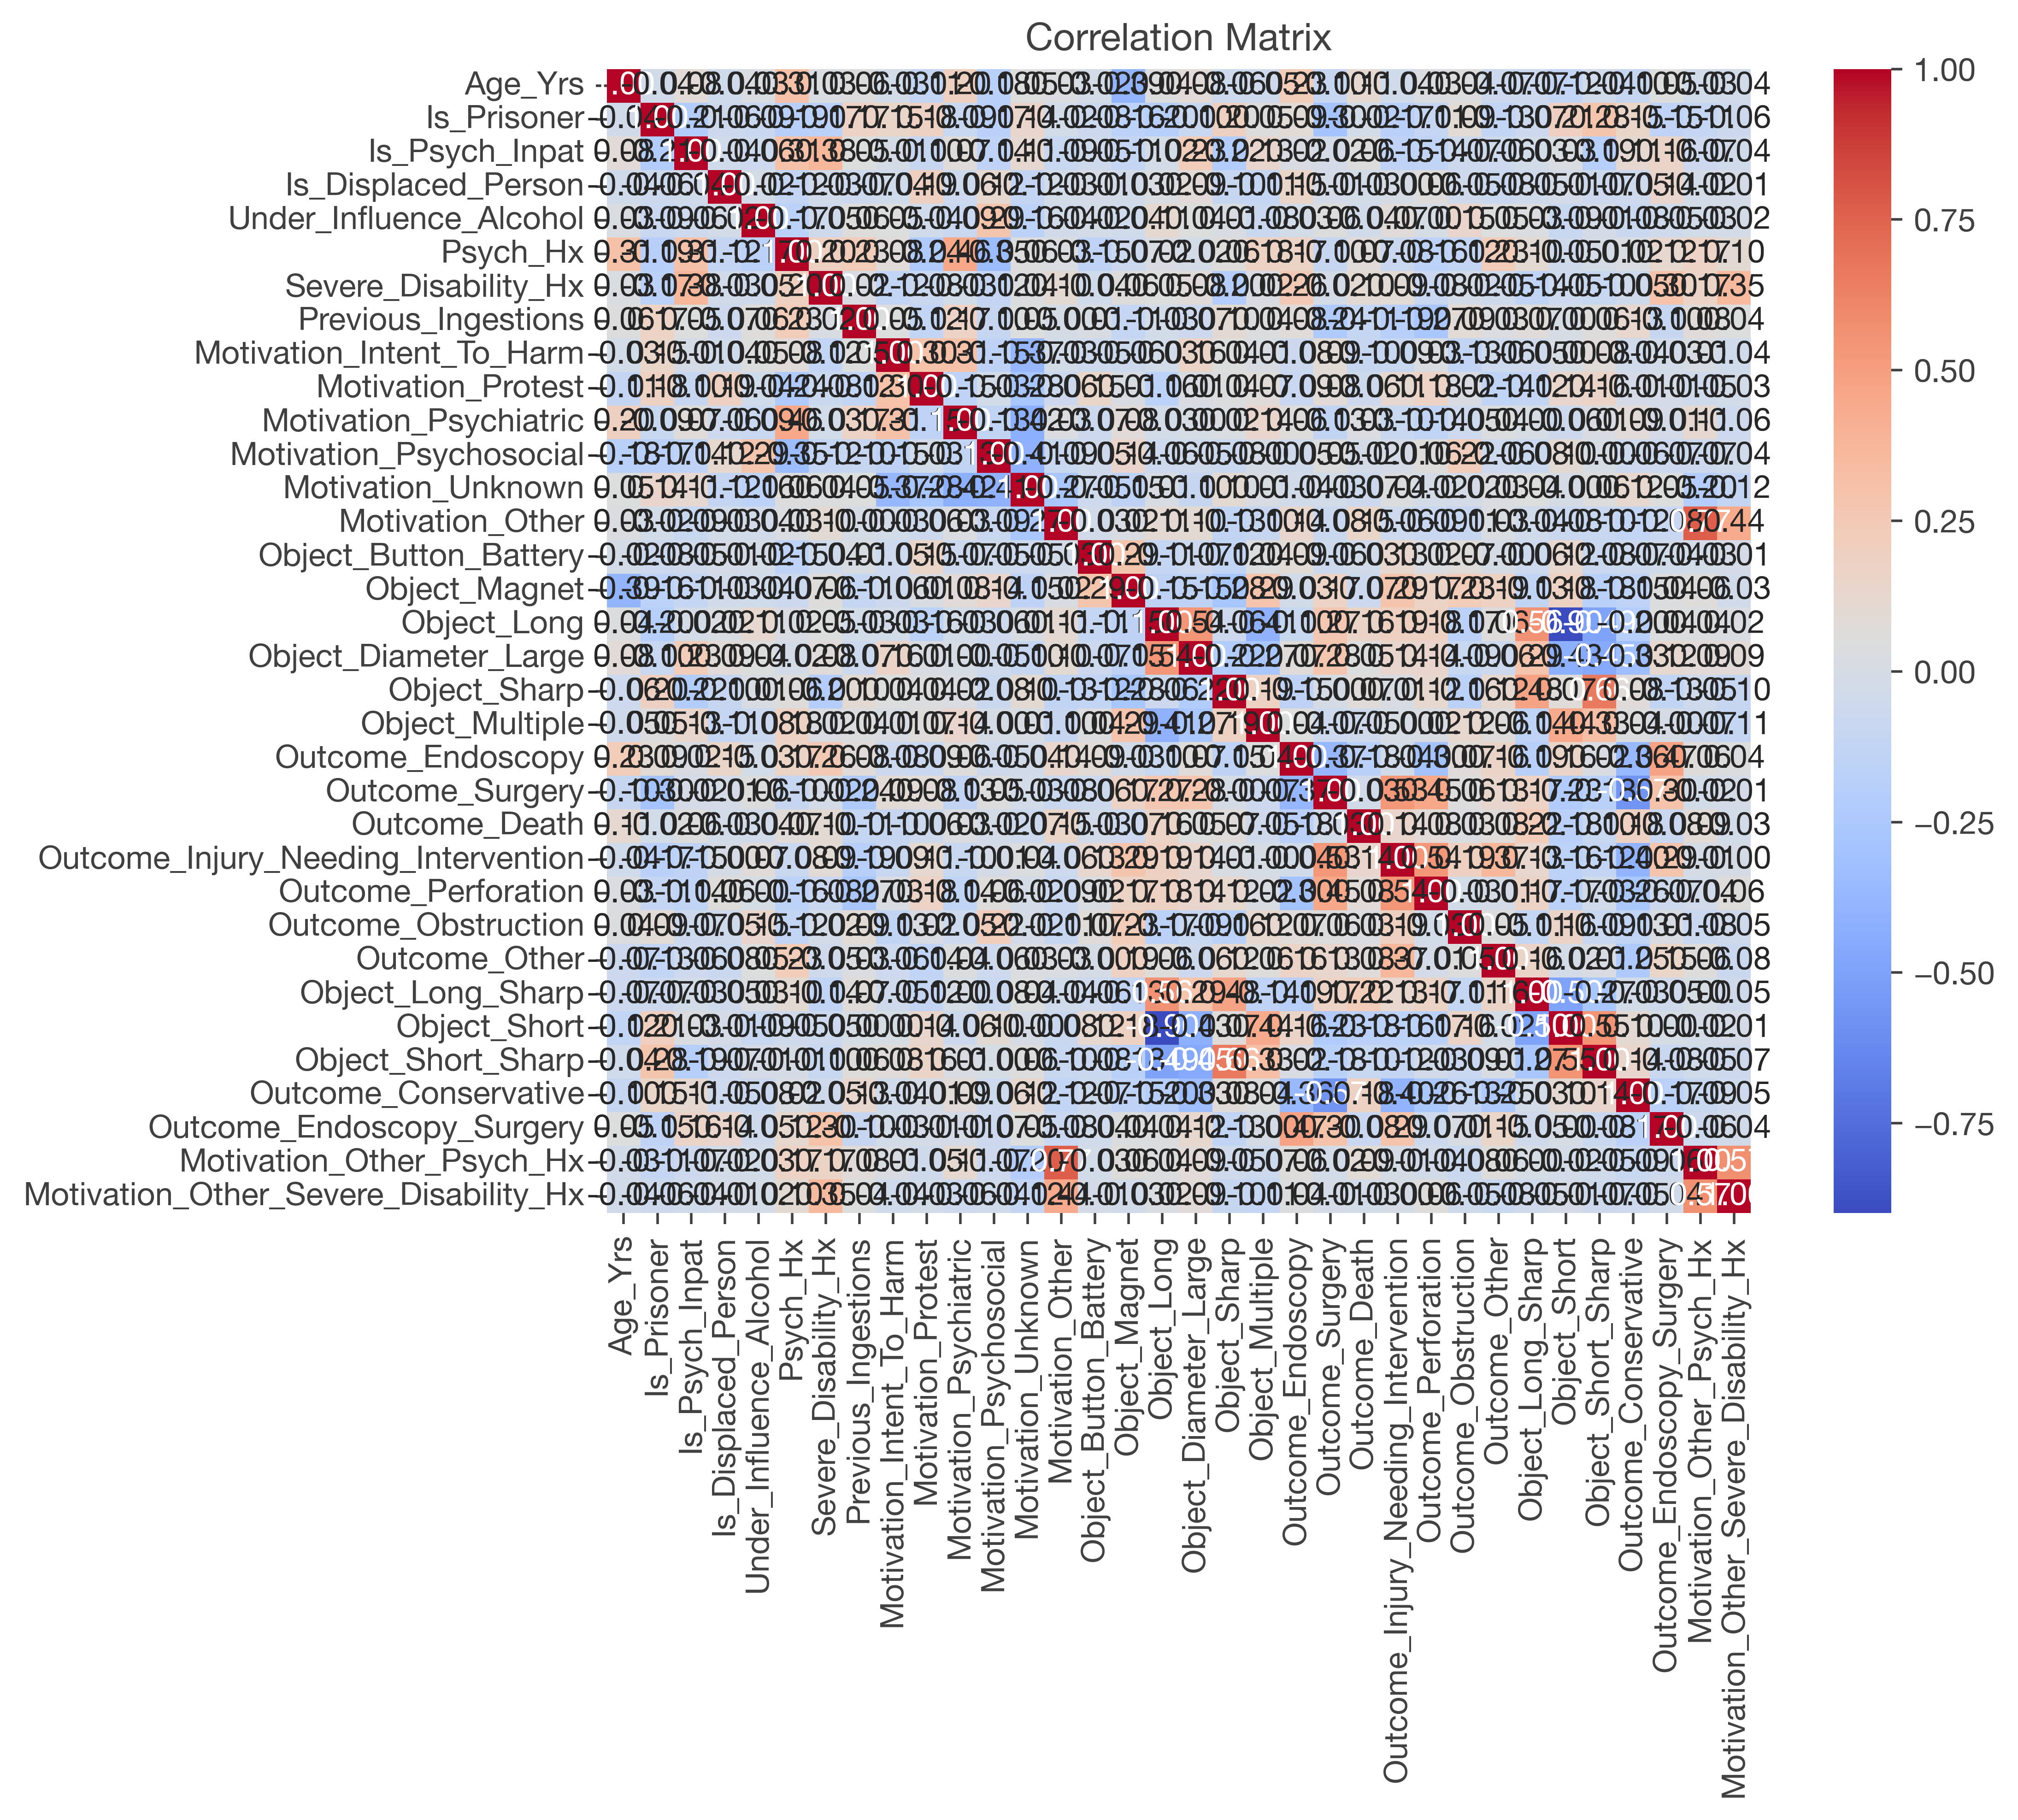

In [24]:
# Compute correlation matrix
corr = case_df.corr(numeric_only=True)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()

# Save figure
fig_path = os.path.join(figures_path, "correlation_matrix.png")
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()


In [25]:
# Step 1: Compute the correlation matrix
corr_matrix = case_df.corr(numeric_only=True)

# Step 2: Unstack to get all variable pairs
corr_pairs = corr_matrix.unstack()

# Step 3: Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Step 4: Drop duplicate pairs (e.g., A-B and B-A)
corr_pairs = corr_pairs.drop_duplicates()

# Step 5: Sort by absolute correlation value (strongest first)
sorted_corr = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

# Step 6: Convert top 20 to DataFrame
top_corr_df = sorted_corr.head(30).reset_index()
top_corr_df.columns = ['Variable A', 'Variable B', 'Correlation']

# Step 7: Clean variable names (replace underscores with spaces)
top_corr_df['Variable A'] = top_corr_df['Variable A'].str.replace('_', ' ')
top_corr_df['Variable B'] = top_corr_df['Variable B'].str.replace('_', ' ')

# Step 8: Round correlation values for clarity
top_corr_df['Correlation'] = top_corr_df['Correlation'].round(3)

# Step 9: Convert to LaTeX
latex_table = top_corr_df.to_latex(
    index=False,
    caption=None,
    label=None,
    escape=True
)

# Wrap with a properly centered LaTeX table block
latex_wrapped = f"""
\\begin{{table}}[H]
\\centering
\\caption{{Top 30 strongest pairwise Pearson correlations between variables}}
\\label{{tab:top-correlations}}
{latex_table}
\\end{{table}}
\\FloatBarrier
"""

# Step 10: Define and create output path using os.path
tables_folder = os.path.join(output_path, "tables")
os.makedirs(tables_folder, exist_ok=True)
table_file = os.path.join(tables_folder, "top_correlations.tex")

# Step 11: Write LaTeX table to file
with open(table_file, "w") as f:
    f.write(latex_wrapped)

print(f"LaTeX table written to: {table_file}")
top_corr_df

LaTeX table written to: /Users/jackedge/Projects/msc_dissertation/iifo_motivation/output/reports/data_extraction/tables/top_correlations.tex


Variable A  \
0                           Object Long   
1                      Motivation Other   
2                          Object Sharp   
3                       Outcome Surgery   
4             Motivation Other Psych Hx   
5                           Object Long   
6                          Object Short   
7                           Object Long   
8   Outcome Injury Needing Intervention   
9                       Outcome Surgery   
10                    Object Long Sharp   
11                          Object Long   
12                         Object Sharp   
13                    Outcome Endoscopy   
14                             Psych Hx   
15                      Outcome Surgery   
16                Object Diameter Large   
17                      Object Multiple   
18                     Motivation Other   
19                Object Diameter Large   
20               Motivation Psychiatric   
21                          Object Long   
22              Motivation Psychosocial   
23  Outcome Injury Needing Intervention   
24                              Age Yrs   
25                       Is Psych Inpat   
26  Outcome Injury Needing Intervention   
27            Motivation Intent To Harm   
28                    Outcome Endoscopy   
29                    Outcome Endoscopy   

                               Variable B  Correlation  
0                            Object Short       -0.899  
1               Motivation Other Psych Hx        0.765  
2                      Object Short Sharp        0.661  
3                    Outcome Conservative       -0.571  
4   Motivation Other Severe Disability Hx        0.571  
5                       Object Long Sharp        0.558  
6                      Object Short Sharp        0.551  
7                   Object Diameter Large        0.545  
8                     Outcome Perforation        0.537  
9     Outcome Injury Needing Intervention        0.533  
10                           Object Short       -0.497  
11                     Object Short Sharp       -0.494  
12                      Object Long Sharp        0.479  
13              Outcome Endoscopy Surgery        0.474  
14                 Motivation Psychiatric        0.456  
15                    Outcome Perforation        0.455  
16                     Object Short Sharp       -0.454  
17                           Object Short        0.438  
18  Motivation Other Severe Disability Hx        0.437  
19                           Object Short       -0.429  
20                     Motivation Unknown       -0.418  
21                        Object Multiple       -0.410  
22                     Motivation Unknown       -0.408  
23                   Outcome Conservative       -0.400  
24                          Object Magnet       -0.388  
25                   Severe Disability Hx        0.376  
26                          Outcome Other        0.375  
27                     Motivation Unknown       -0.374  
28                        Outcome Surgery       -0.373  
29                   Outcome Conservative       -0.359

In [26]:
def calculate_rate_by_study(
    input_df,
    output_df,
    condition,
    study_col='Study_ID',
    id_col='Patient_ID',
    prefix='Outcome'
):
    """
    Calculates rate of a condition per study and merges it into output_df.
    
    Parameters:
        input_df (DataFrame): Raw case-level data.
        output_df (DataFrame): Paper-level data (e.g. one row per study).
        condition (Series[bool]): Boolean mask to filter input_df.
        study_col (str): Column in both dataframes that identifies the study.
        id_col (str): Column to count as individual cases.
        prefix (str): Prefix for naming output columns (e.g. 'Endoscopy' or '%_Is_Prisoner').

    Returns:
        DataFrame: Modified output_df with total cases, condition counts, and rate.
    """
    input_df = input_df.copy()
    input_df[study_col] = input_df[study_col].astype(str)
    output_df = output_df.copy()
    output_df[study_col] = output_df[study_col].astype(str)
    
    # Total cases per study
    total_counts = input_df.groupby(study_col)[id_col].count()
    
    # Cases matching the condition
    matching_counts = input_df[condition].groupby(study_col)[id_col].count()
    
    # Combine into summary DataFrame
    summary = pd.DataFrame({
        'Total_Cases': total_counts,
        f'{prefix}_Cases': matching_counts
    }).fillna(0)
    
    # Calculate rate
    summary[f'{prefix}_Rate'] = summary[f'{prefix}_Cases'] / summary['Total_Cases']
    
    # Merge into output_df
    output_df = output_df.drop(columns=['Total_Cases'], errors='ignore')
    output_df = output_df.merge(summary, on=study_col, how='left')
    
    # Fill in missing values
    output_df[['Total_Cases', f'{prefix}_Cases', f'{prefix}_Rate']] = output_df[[
        'Total_Cases', f'{prefix}_Cases', f'{prefix}_Rate'
    ]].fillna(0)
    
    return output_df

In [27]:
def calculate_age_summary_by_study(
    input_df,
    output_df,
    age_col='Age',
    study_col='Study_ID',
    id_col='Patient_ID',
    prefix='Age_Yrs'
):
    """
    Calculates summary stats (min, max, mean, median) for age per study and merges into output_df.

    Parameters:
        input_df (DataFrame): Case-level data.
        output_df (DataFrame): Paper-level data (1 row per study).
        age_col (str): Name of the column containing age data.
        study_col (str): Study identifier column (shared across both dataframes).
        id_col (str): Patient ID column, used only for grouping safety.
        prefix (str): Prefix for new column names.

    Returns:
        DataFrame: Updated output_df with Age_Low, Age_High, Age_Mean, Age_Median
    """
    input_df = input_df.copy()
    output_df = output_df.copy()

    input_df[study_col] = input_df[study_col].astype(str)
    output_df[study_col] = output_df[study_col].astype(str)

    # Ensure Age is numeric
    input_df[age_col] = pd.to_numeric(input_df[age_col], errors='coerce')

    # Group and calculate summary stats
    age_summary = input_df.groupby(study_col)[age_col].agg(
        Age_Low='min',
        Age_High='max',
        Age_Mean='mean',
        Age_Median='median'
    ).reset_index()

    # Merge into paper_data
    output_df = output_df.merge(age_summary, on=study_col, how='left')

    return output_df

In [28]:
def calculate_category_rates_by_study(
    input_df,
    output_df,
    category_col,
    categories,
    study_col='Study_ID',
    id_col='Patient_ID',
    prefix='Gender'
):
    """
    Calculates rate of each category value per study and merges them into output_df.

    Parameters:
        input_df (DataFrame): Raw case-level data.
        output_df (DataFrame): Paper-level data (one row per study).
        category_col (str): Column containing the category (e.g. 'Gender').
        categories (dict): Dictionary mapping raw values to desired column suffixes.
                           E.g., {'Male': 'Male', 'Female': 'Female', 'UK': 'Unknown'}
        study_col (str): Column name that identifies the study (default 'Study_ID').
        id_col (str): Column name that identifies unique patients (default 'Patient_ID').
        prefix (str): Prefix for the output column names.

    Returns:
        DataFrame: Updated output_df with category rates per study.
    """
    input_df = input_df.copy()
    output_df = output_df.copy()
    
    input_df[study_col] = input_df[study_col].astype(str)
    output_df[study_col] = output_df[study_col].astype(str)

    # Total cases per study
    total_counts = input_df.groupby(study_col)[id_col].count()

    # Start the summary DataFrame with total counts
    summary = pd.DataFrame({'Total_Cases': total_counts})

    # Loop through each category
    for raw_value, label in categories.items():
        cat_counts = input_df[input_df[category_col] == raw_value].groupby(study_col)[id_col].count()
        summary[f'{prefix}_{label}_Cases'] = cat_counts
        summary[f'{prefix}_{label}_Rate'] = (cat_counts / summary['Total_Cases'])

    # Fill any missing values with 0
    summary = summary.fillna(0)

    # Merge into output_df
    output_df = output_df.drop(columns=['Total_Cases'], errors='ignore')
    output_df = output_df.merge(summary, on=study_col, how='left')
    
    # Fill missing values (e.g., studies with no cases)
    cols_to_fill = ['Total_Cases'] + [f'{prefix}_{label}_{suffix}' for label in categories.values() for suffix in ['Cases', 'Rate']]
    output_df[cols_to_fill] = output_df[cols_to_fill].fillna(0)

    return output_df

In [29]:
paper_df

Study_ID      First_Author  Publication_Year  \
0          3  Richardson, M.H.              1886   
1         39      Tanigawa, K.              1993   
2         46  O'Sullivan, S.T.              1996   
3         51    Losanoff, J.E.              1996   
4         54    Losanoff, J.E.              1997   
..       ...               ...               ...   
91       476       Akgul, N.C.              2024   
92       482       Farhadi, F.              2024   
93       483       Dranova, S.              2024   
94       484       Buils, F.J.              2024   
95       485         Bhumi, S.              2024   

                                                Title Study_Design  \
0   A Case Of Gastrotomy. Digital Exploration Of S...  Case Series   
1   Endoscopic Removal Of Foreign Bodies In The Me...  Case Report   
2   Deliberate Ingestion Of Foreign Bodies By Inst...  Case Series   
3   Gastrointestinal 'Crosses'. A New Shade From A...  Case Series   
4        Oesophageal "Cross"--A Sinister Foreign Body  Case Report   
..                                                ...          ...   
91  Chronic Foreign Body Ingestion In Two Adults W...  Case Report   
92  This Is A Successful Removal Of More Than 450 ...  Case Report   
93  Difficult Oesophageal Foreign Body Removal: A ...  Case Report   
94  Repeated Behavior Of Deliberate Foreign Body I...  Case Report   
95  Esophageal Button Battery Retrieval: Time-In M...  Case Report   

                                    Population_Type  \
0                                               NaN   
1                                               NaN   
2   Mixed Prisoner Psychiatric Inpatient Population   
3                                               NaN   
4                                               NaN   
..                                              ...   
91                                              NaN   
92                                              NaN   
93                                              NaN   
94                                              NaN   
95                                              NaN   

                                        Study_Setting          Study_Location  \
0                                          Historical                     USA   
1                                                 NaN                   Japan   
2   Department of Plastic & Reconstructive Surgery...   Wilton, Cork, Ireland   
3                     University Hospital in Bulgaria                Bulgaria   
4                     University Hospital in Bulgaria                Bulgaria   
..                                                ...                     ...   
91  Department of General Surgery, Gebze Fatih Sta...         Kocaeli, Turkey   
92  Department of General Surgery, School of Medic...             Ahvaz, Iran   
93              ENT Department, Frimley Park Hospital             Frimley, UK   
94  Department of General and Digestive Surgery. S...  Reus, Tarragona, Spain   
95  Gastroenterology and Hepatology, New York Pres...   Queens, New York, USA   

                                     DOI Data_Extracted Bibliography_Searched  \
0            10.1056/NEJM188612161152403              Y                     N   
1                                    NaN              Y                     N   
2                     10.1007/bf02943095              Y                     N   
3   10.1001/archsurg.1996.01430140056015              Y                     N   
4                    10.1136/emj.14.1.54              Y                     N   
..                                   ...            ...                   ...   
91                    10.4328/ACAM.22190              Y                     N   
92            10.1186/s13256-024-04672-3              Y                     N   
93            10.1017/ S0022215124000033              Y                     N   
94                   10.52916/jmrs244144              Y                     N   
95           

In [30]:
# Add aggregate data from each case report to paper data

In [31]:
# Copy paper data dataframe
agg_paper_df = paper_df.copy()

# Calculate age summary for each study
agg_paper_df = calculate_age_summary_by_study(
    input_df=case_df,
    output_df=agg_paper_df,
    age_col='Age_Yrs'
)

In [32]:
gender_map = {
    'Male': 'Male',
    'Female': 'Female',
    'Unknown': 'Unknown'
}

# Calculate gender category rates
agg_paper_df = calculate_category_rates_by_study(
    input_df=case_df,
    output_df=agg_paper_df,
    category_col='Gender',
    categories=gender_map,
    prefix='Gender'
)

In [33]:
for col in population_cols:
    agg_paper_df = calculate_rate_by_study(
        input_df=case_df, 
        output_df=agg_paper_df, 
        condition=case_df[col] == 1,
        prefix=col
    )

for col in motivation_cols:
    agg_paper_df = calculate_rate_by_study(
    input_df=case_df, 
    output_df=agg_paper_df, 
    condition=case_df[col] == 1,
    prefix=col
)

for col in object_cols:
    agg_paper_df = calculate_rate_by_study(
    input_df=case_df, 
    output_df=agg_paper_df, 
    condition=case_df[col] == 1,
    prefix=col
)

for col in outcome_cols:
    agg_paper_df = calculate_rate_by_study(
    input_df=case_df, 
    output_df=agg_paper_df, 
    condition=case_df[col] == 1,
    prefix=col
)


In [34]:
agg_paper_df.columns

Index(['Study_ID', 'First_Author', 'Publication_Year', 'Title', 'Study_Design',
       'Population_Type', 'Study_Setting', 'Study_Location', 'DOI',
       'Data_Extracted', 'Bibliography_Searched', 'Exclude', 'Notes',
       'Case_Count', 'Age_Low', 'Age_High', 'Age_Mean', 'Age_Median',
       'Gender_Male_Cases', 'Gender_Male_Rate', 'Gender_Female_Cases',
       'Gender_Female_Rate', 'Gender_Unknown_Cases', 'Gender_Unknown_Rate',
       'Is_Prisoner_Cases', 'Is_Prisoner_Rate', 'Is_Psych_Inpat_Cases',
       'Is_Psych_Inpat_Rate', 'Is_Displaced_Person_Cases',
       'Is_Displaced_Person_Rate', 'Under_Influence_Alcohol_Cases',
       'Under_Influence_Alcohol_Rate', 'Psych_Hx_Cases', 'Psych_Hx_Rate',
       'Severe_Disability_Hx_Cases', 'Severe_Disability_Hx_Rate',
       'Previous_Ingestions_Cases', 'Previous_Ingestions_Rate',
       'Motivation_Intent_To_Harm_Cases', 'Motivation_Intent_To_Harm_Rate',
       'Motivation_Protest_Cases', 'Motivation_Protest_Rate',
       'Motivation_Psych

In [35]:
aggregate_paper_data_path = os.path.join(PROC_DATA_DIR, "data_extraction", "aggregate_paper_data.csv")
agg_paper_df.to_csv(aggregate_paper_data_path)

In [36]:
processed_case_data_path = os.path.join(os.path.join(PROC_DATA_DIR, "data_extraction", "processed_case_data.csv"))
proc_case_df = case_df
proc_case_df.to_csv(processed_case_data_path)

In [37]:
# Create dataframe for case series and larger papers
series_df = pd.DataFrame(
    columns=agg_paper_df.columns
)

# Drop unneccessary columns
series_df = series_df.drop([ 
    'Title',
    'Study_Design', 
    'Study_Setting',
    'Study_Location',
    'DOI',
    'Data_Extracted',
    'Bibliography_Searched',
    'Exclude' 
    ], 
    axis=1)

# Rename Notes column to comments
series_df = series_df.rename(columns={
    'Notes': 'Comments'
})

# Create blank column for Patient_Count, to calculate repeat ingestion rate later
series_df['Patient_Count'] = np.nan

# Reorder columns
series_df = series_df[['Study_ID', 'First_Author', 'Publication_Year', 'Comments', 'Patient_Count',
       'Case_Count', 'Age_Low', 'Age_High', 'Age_Mean', 'Age_Median',
       'Gender_Male_Cases', 'Gender_Male_Rate', 'Gender_Female_Cases',
       'Gender_Female_Rate', 'Gender_Unknown_Cases', 'Gender_Unknown_Rate',
       'Is_Prisoner_Cases', 'Is_Prisoner_Rate', 'Is_Psych_Inpat_Cases',
       'Is_Psych_Inpat_Rate', 'Is_Displaced_Person_Cases',
       'Is_Displaced_Person_Rate', 'Under_Influence_Alcohol_Cases',
       'Under_Influence_Alcohol_Rate', 'Psych_Hx_Cases', 'Psych_Hx_Rate',
       'Severe_Disability_Hx_Cases', 'Severe_Disability_Hx_Rate',
       'Previous_Ingestions_Cases', 'Previous_Ingestions_Rate',
       'Motivation_Intent_To_Harm_Cases', 'Motivation_Intent_To_Harm_Rate',
       'Motivation_Protest_Cases', 'Motivation_Protest_Rate',
       'Motivation_Psychiatric_Cases', 'Motivation_Psychiatric_Rate',
       'Motivation_Psychosocial_Cases', 'Motivation_Psychosocial_Rate',
       'Motivation_Unknown_Cases', 'Motivation_Unknown_Rate',
       'Motivation_Other_Cases', 'Motivation_Other_Rate',
       'Motivation_Other_Psych_Hx_Cases', 'Motivation_Other_Psych_Hx_Rate',
       'Motivation_Other_Severe_Disability_Hx_Cases',
       'Motivation_Other_Severe_Disability_Hx_Rate',
       'Object_Button_Battery_Cases', 'Object_Button_Battery_Rate',
       'Object_Magnet_Cases', 'Object_Magnet_Rate', 'Object_Long_Cases',
       'Object_Long_Rate', 'Object_Diameter_Large_Cases',
       'Object_Diameter_Large_Rate', 'Object_Sharp_Cases', 'Object_Sharp_Rate',
       'Object_Multiple_Cases', 'Object_Multiple_Rate',
       'Object_Long_Sharp_Cases', 'Object_Long_Sharp_Rate',
       'Object_Short_Cases', 'Object_Short_Rate', 'Object_Short_Sharp_Cases',
       'Object_Short_Sharp_Rate', 'Outcome_Endoscopy_Cases',
       'Outcome_Endoscopy_Rate', 'Outcome_Surgery_Cases',
       'Outcome_Surgery_Rate', 'Outcome_Death_Cases', 'Outcome_Death_Rate',
       'Outcome_Injury_Needing_Intervention_Cases',
       'Outcome_Injury_Needing_Intervention_Rate', 'Outcome_Perforation_Cases',
       'Outcome_Perforation_Rate', 'Outcome_Obstruction_Cases',
       'Outcome_Obstruction_Rate', 'Outcome_Other_Cases', 'Outcome_Other_Rate',
       'Outcome_Conservative_Cases', 'Outcome_Conservative_Rate',
       'Total_Cases', 'Outcome_Endoscopy_Surgery_Cases',
       'Outcome_Endoscopy_Surgery_Rate']]

In [38]:
print(series_df.columns)

Index(['Study_ID', 'First_Author', 'Publication_Year', 'Comments',
       'Patient_Count', 'Case_Count', 'Age_Low', 'Age_High', 'Age_Mean',
       'Age_Median', 'Gender_Male_Cases', 'Gender_Male_Rate',
       'Gender_Female_Cases', 'Gender_Female_Rate', 'Gender_Unknown_Cases',
       'Gender_Unknown_Rate', 'Is_Prisoner_Cases', 'Is_Prisoner_Rate',
       'Is_Psych_Inpat_Cases', 'Is_Psych_Inpat_Rate',
       'Is_Displaced_Person_Cases', 'Is_Displaced_Person_Rate',
       'Under_Influence_Alcohol_Cases', 'Under_Influence_Alcohol_Rate',
       'Psych_Hx_Cases', 'Psych_Hx_Rate', 'Severe_Disability_Hx_Cases',
       'Severe_Disability_Hx_Rate', 'Previous_Ingestions_Cases',
       'Previous_Ingestions_Rate', 'Motivation_Intent_To_Harm_Cases',
       'Motivation_Intent_To_Harm_Rate', 'Motivation_Protest_Cases',
       'Motivation_Protest_Rate', 'Motivation_Psychiatric_Cases',
       'Motivation_Psychiatric_Rate', 'Motivation_Psychosocial_Cases',
       'Motivation_Psychosocial_Rate', 'Motivati

In [39]:
# Export to csv to begin data extraction
export_path = os.path.join(PROC_DATA_DIR, "data_extraction", "series_data_start.csv")
series_df.to_csv(export_path, index=False)
print(export_path)

/Users/jackedge/Projects/msc_dissertation/iifo_motivation/input/processed_data/data_extraction/series_data_start.csv


In [40]:
paper_df['Data_Extracted'].value_counts()

Data_Extracted
Y    92
N     4
Name: count, dtype: int64

## Series Data

In [41]:
# Import data
import_path = os.path.join(RAW_DATA_DIR, "data_extraction", "series_data_end.xlsx")
series_df = pd.read_excel(import_path)

In [42]:
# Deal with UK (Unknown values)
series_df = series_df.replace("UK", np.nan)

text_cols = ['Study_ID', 'Comments'] + [col for col in series_df.columns if col.split('_')[-1] == 'Long']

# Create list of columns containing numerical values
numerical_cols = series_df.columns.drop(text_cols)

# Convert numerical columns to type float
series_df[numerical_cols] = series_df[numerical_cols].astype(float)

series_df.head()

/var/folders/s8/_px9wcjn5tlgw4wb39b3975m0000gn/T/ipykernel_6467/1646766332.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series_df = series_df.replace("UK", np.nan)


Study_ID                                           Comments  Patient_Count  \
0        46                                                NaN           30.0   
1       131                                                NaN           60.0   
2       139                                                NaN           33.0   
3       192  Does not report number of rates of complicatio...           30.0   
4       256  Does not give empirical data on population cha...          762.0   

   Case_Count  Age_Low  Age_High  Age_Mean  Age_Median  \
0        36.0     15.0      69.0      25.8         NaN   
1       262.0     17.0      82.0      33.0         NaN   
2       305.0     18.0      56.0      35.4         NaN   
3       141.0     20.0      48.0      27.0         NaN   
4       472.0      NaN       NaN       NaN         NaN   

   Verified_Ingestion_Cases  Verified_Ingestion_Rate  ...  \
0                       NaN                      NaN  ...   
1                       NaN                      NaN  ...   
2                       NaN                      NaN  ...   
3                       NaN                      NaN  ...   
4                       NaN                      NaN  ...   

   Outcome_Perforation_Rate  Outcome_Obstruction_Cases  \
0                       NaN                        2.0   
1                       NaN                        0.0   
2                       0.0                        1.0   
3                       NaN                        NaN   
4                       NaN                        NaN   

   Outcome_Obstruction_Rate  Outcome_Other_Cases  Outcome_Other_Rate  \
0                       NaN                  1.0                 NaN   
1                       0.0                  4.0                 0.0   
2                       NaN                 10.0                 NaN   
3                       NaN                  NaN                 NaN   
4                       NaN                  NaN                 NaN   

                                  Outcome_Other_Long  \
0                                        Haemorrhage   
1                                           Bleeding   
2  3.6%) including mucosal trauma and/or bleeding...   
3                                                NaN   
4                                                NaN   

   Outcome_Conservative_Cases  Outcome_Conservative_Rate  \
0                        30.0                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                       0.26   
4                         NaN                        NaN   

   Outcome_Endoscopy_Surgery_Cases  Outcome_Endoscopy_Surgery_Rate  
0                              1.0                             NaN  
1                             12.0                             NaN  
2                              2.0                             NaN  
3                              NaN                            0.03  
4                              NaN                             NaN  

[5 rows x 86 columns]

In [43]:
series_df.describe()

Study_ID  Patient_Count   Case_Count    Age_Low   Age_High  \
count   26.000000      24.000000    23.000000  15.000000  15.000000   
mean   377.346154     125.458333   191.739130  15.738867  54.400000   
std    146.690952     264.401536   241.819094   8.280403  25.659306   
min     46.000000       1.000000    17.000000   0.500000  11.000000   
25%    292.750000      18.000000    44.000000  12.000000  43.500000   
50%    416.500000      33.000000   133.000000  18.000000  50.000000   
75%    497.000000      60.750000   250.500000  19.500000  75.500000   
max    581.000000    1110.000000  1110.000000  28.000000  99.000000   

        Age_Mean  Age_Median  Verified_Ingestion_Cases  \
count  14.000000   10.000000                 12.000000   
mean   29.035714   28.292000                218.916667   
std     6.344544   18.428739                294.661426   
min    18.000000    0.220000                 22.000000   
25%    24.175000   19.500000                 70.250000   
50%    27.500000   31.000000                145.000000   
75%    33.675000   35.000000                246.750000   
max    40.600000   58.000000               1110.000000   

       Verified_Ingestion_Rate  Gender_Male_Cases  ...  \
count                     13.0          14.000000  ...   
mean                       1.0         104.928571  ...   
std                        0.0         155.335104  ...   
min                        1.0           0.000000  ...   
25%                        1.0          19.500000  ...   
50%                        1.0          43.500000  ...   
75%                        1.0          98.250000  ...   
max                        1.0         576.000000  ...   

       Outcome_Perforation_Cases  Outcome_Perforation_Rate  \
count                  13.000000                  6.000000   
mean                    6.538462                  0.085667   
std                    12.620191                  0.209840   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     1.000000                  0.000000   
75%                     3.000000                  0.000000   
max                    44.000000                  0.514000   

       Outcome_Obstruction_Cases  Outcome_Obstruction_Rate  \
count                   6.000000                   4.00000   
mean                    0.833333                   0.02025   
std                     0.983192                   0.04050   
min                     0.000000                   0.00000   
25%                     0.000000                   0.00000   
50%                     0.500000                   0.00000   
75%                     1.750000                   0.02025   
max                     2.000000                   0.08100   

       Outcome_Other_Cases  Outcome_Other_Rate  Outcome_Conservative_Cases  \
count            11.000000            5.000000                   11.000000   
mean             15.818182            0.157000                   10.000000   
std              30.983280            0.300782                   10.945319   
min               0.000000            0.000000                    0.000000   
25%               1.000000            0.000000                    0.000000   
50%               4.000000            0.000000                    9.000000   
75%               7.500000            0.095000                   17.500000   
max             102.000000            0.690000                   30.000000   

       Outcome_Conservative_Rate  Outcome_Endoscopy_Surgery_Cases  \
count                  10.000000                        12.000000   
mean                    0.136800                         3.750000   
std                     0.175654                         4.474676   
min                     0.000000                         0.000000   
25%                     0.000000                         1.000000   
50%                     0.042000                         2.000000   
75%                

In [44]:
def calculate_variable_rate(input_df, 
                            output_df,
                            denominator_col,
                            variable_cols):

    input_df = input_df.copy()
    output_df = output_df.copy()

    # Create effective denominator with fallback
    input_df['effective_denominator'] = input_df[denominator_col].fillna(input_df['Patient_Count'])

    suffixes = ['_Cases', '_Rate']
    variables = set()

    for col in variable_cols:
        for suffix in suffixes:
            if col.endswith(suffix):
                variables.add(col[:-len(suffix)])
                break

    for var in variables:
        rate_col = f"{var}_Rate"
        case_col = f"{var}_Cases"

        if rate_col in input_df.columns and case_col in input_df.columns:
            # Fill missing rate
            mask_rate_missing = input_df[rate_col].isna() & input_df[case_col].notna()
            output_df.loc[mask_rate_missing, rate_col] = (
                input_df.loc[mask_rate_missing, case_col] / input_df.loc[mask_rate_missing, 'effective_denominator']
            )

            # Fill missing cases
            mask_cases_missing = input_df[case_col].isna() & input_df[rate_col].notna()
            output_df.loc[mask_cases_missing, case_col] = (
                input_df.loc[mask_cases_missing, rate_col] * input_df.loc[mask_cases_missing, 'effective_denominator']
            )

    # Optionally drop the temporary column
    output_df.drop(columns=['effective_denominator'], inplace=True, errors='ignore')

    return output_df

In [45]:
# Define object_cols
object_cols = [col for col in series_df.columns if col.split('_')[0] == 'Object']

# Apply function, calculating rate and cases from 'Case_Count'
series_df = calculate_variable_rate(input_df=series_df, 
                                    output_df=series_df.copy(), 
                                    denominator_col='Case_Count', 
                                    variable_cols=object_cols)

series_df[object_cols].head()

Object_Count  Object_Button_Battery_Cases  Object_Button_Battery_Rate  \
0           NaN                          0.0                         0.0   
1           NaN                          NaN                         NaN   
2           NaN                          NaN                         NaN   
3         228.0                          NaN                         NaN   
4        1175.0                          NaN                         NaN   

   Object_Magnet_Cases  Object_Magnet_Rate  Object_Long_Cases  \
0                  0.0                 0.0              6.000   
1                  NaN                 NaN            147.000   
2                  NaN                 NaN            146.000   
3                  0.0                 0.0             97.008   
4                  NaN                 NaN                NaN   

   Object_Long_Rate  Object_Diameter_Large_Cases  Object_Diameter_Large_Rate  \
0          0.166667                        6.000                    0.166667   
1          0.560000                          NaN                         NaN   
2          0.478689                          NaN                         NaN   
3          0.688000                       97.008                    0.688000   
4               NaN                          NaN                         NaN   

   Object_Sharp_Cases  Object_Sharp_Rate  Object_Multiple_Cases  \
0              32.000           0.888889                   14.0   
1                 NaN                NaN                   71.0   
2              63.000           0.206557                    NaN   
3              44.556           0.316000                    NaN   
4                 NaN                NaN                    NaN   

   Object_Multiple_Rate  Object_Long_Sharp_Cases  Object_Long_Sharp_Rate  \
0              0.388889                      NaN                     NaN   
1              0.270000                      NaN                     NaN   
2                   NaN                      NaN                     NaN   
3                   NaN                      NaN                     NaN   
4                   NaN                      NaN                     NaN   

   Object_Short_Cases  Object_Short_Rate  Object_Short_Sharp_Cases  \
0              30.000           0.833333                       NaN   
1              46.000           0.180000                       9.0   
2                 NaN                NaN                       NaN   
3              43.992           0.312000                       NaN   
4                 NaN                NaN                       NaN   

   Object_Short_Sharp_Rate  
0                      NaN  
1                 0.034351  
2                      NaN  
3                      NaN  
4                      NaN

In [46]:
# Define motivation_cols
motivation_cols = [col for col in series_df.columns if col.split('_')[0] == 'Motivation']

# Apply function, calculating rate and cases from 'Case_Count'
series_df = calculate_variable_rate(input_df=series_df, 
                                    output_df=series_df.copy(), 
                                    denominator_col='Case_Count', 
                                    variable_cols=motivation_cols)

series_df[motivation_cols].head()

Motivation_Intent_To_Harm_Cases  Motivation_Intent_To_Harm_Rate  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   

   Motivation_Protest_Cases  Motivation_Protest_Rate  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                       NaN                      NaN   
4                       NaN                      NaN   

   Motivation_Psychiatric_Cases  Motivation_Psychiatric_Rate  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   Motivation_Psychosocial_Cases  Motivation_Psychosocial_Rate  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

   Motivation_Unknown_Cases  Motivation_Unknown_Rate  Motivation_Other_Cases  \
0                      36.0                      1.0                     NaN   
1                     262.0                      1.0                     NaN   
2                     305.0                      1.0                     NaN   
3                     141.0                      1.0                     NaN   
4                     472.0                      1.0                     NaN   

   Motivation_Other_Rate  Motivation_Other_Psych_Hx_Cases  \
0                    NaN                              NaN   
1                    NaN                              NaN   
2                    NaN                              NaN   
3                    NaN                              NaN   
4                    NaN                              NaN   

   Motivation_Other_Psych_Hx_Rate  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

   Motivation_Other_Severe_Disability_Hx_Cases  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Motivation_Other_Severe_Disability_Hx_Rate  
0                                         NaN  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN

In [47]:
# Define motivation_cols
outcome_cols = [col for col in series_df.columns if col.split('_')[0] == 'Outcome']

# Apply function, calculating rate and cases from 'Case_Count'
series_df = calculate_variable_rate(input_df=series_df, 
                                    output_df=series_df.copy(), 
                                    denominator_col='Case_Count', 
                                    variable_cols=outcome_cols)

series_df[outcome_cols].head()

Outcome_Endoscopy_Cases  Outcome_Endoscopy_Rate  Outcome_Surgery_Cases  \
0                      4.0                0.111111                    2.0   
1                    189.0                0.721374                   30.0   
2                      NaN                     NaN                    2.0   
3                     97.0                0.660000                   11.0   
4                      NaN                     NaN                    NaN   

   Outcome_Surgery_Rate  Outcome_Death_Cases  Outcome_Death_Rate  \
0              0.055556                0.000               0.000   
1              0.114504                0.000               0.000   
2              0.006557                0.000               0.000   
3              0.080000                  NaN                 NaN   
4                   NaN                1.888               0.004   

   Outcome_Injury_Needing_Intervention_Cases  \
0                                        3.0   
1                                       20.0   
2                                       11.0   
3                                        NaN   
4                                        NaN   

   Outcome_Injury_Needing_Intervention_Rate  Outcome_Perforation_Cases  \
0                                  0.083333                        1.0   
1                                  0.076336                       16.0   
2                                  0.036066                        0.0   
3                                       NaN                        NaN   
4                                       NaN                        NaN   

   Outcome_Perforation_Rate  Outcome_Obstruction_Cases  \
0                  0.027778                        2.0   
1                  0.061069                        0.0   
2                  0.000000                        1.0   
3                       NaN                        NaN   
4                       NaN                        NaN   

   Outcome_Obstruction_Rate  Outcome_Other_Cases  Outcome_Other_Rate  \
0                  0.055556                  1.0            0.027778   
1                  0.000000                  4.0            0.000000   
2                  0.003279                 10.0            0.032787   
3                       NaN                  NaN                 NaN   
4                       NaN                  NaN                 NaN   

                                  Outcome_Other_Long  \
0                                        Haemorrhage   
1                                           Bleeding   
2  3.6%) including mucosal trauma and/or bleeding...   
3                                                NaN   
4                                                NaN   

   Outcome_Conservative_Cases  Outcome_Conservative_Rate  \
0                       30.00                   0.833333   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                       36.66                   0.260000   
4                         NaN                        NaN   

   Outcome_Endoscopy_Surgery_Cases  Outcome_Endoscopy_Surgery_Rate  
0                             1.00                        0.027778  
1                            12.00                        0.045802  
2                             2.00                        0.006557  
3                             4.23                        0.030000  
4                              NaN                             NaN

In [48]:
# Define population_cols 
population_cols = ['Verified_Ingestion_Cases',	
                   'Verified_Ingestion_Rate',	
                   'Gender_Male_Cases',	
                   'Gender_Male_Rate',	
                   'Gender_Female_Cases',	
                   'Gender_Female_Rate',	
                   'Gender_Unknown_Cases',	
                   'Gender_Unknown_Rate',	
                   'Is_Intentional_Cases',	
                   'Is_Intentional_Rate',	
                   'Is_Prisoner_Cases',	
                   'Is_Prisoner_Rate',	
                   'Is_Psych_Inpat_Cases',	
                   'Is_Psych_Inpat_Rate',	
                   'Is_Displaced_Person_Cases',	
                   'Is_Displaced_Person_Rate',	
                   'Under_Influence_Alcohol_Cases',	
                   'Under_Influence_Alcohol_Rate',	
                   'Psych_Hx_Cases',	
                   'Psych_Hx_Rate',	
                   'Severe_Disability_Hx_Cases',	
                   'Severe_Disability_Hx_Rate',	
                   'Previous_Ingestions_Cases',	
                   'Previous_Ingestions_Rate']

# Apply function, calculating rate and cases from 'Case_Count'
series_df = calculate_variable_rate(input_df=series_df, 
                                    output_df=series_df.copy(), 
                                    denominator_col='Case_Count', 
                                    variable_cols=population_cols)

series_df[population_cols].head()

Verified_Ingestion_Cases  Verified_Ingestion_Rate  Gender_Male_Cases  \
0                       NaN                      NaN             25.000   
1                       NaN                      NaN                NaN   
2                       NaN                      NaN             19.000   
3                       NaN                      NaN            122.247   
4                       NaN                      NaN                NaN   

   Gender_Male_Rate  Gender_Female_Cases  Gender_Female_Rate  \
0          0.694444               11.000            0.305556   
1               NaN                  NaN                 NaN   
2          0.576000               14.000            0.424000   
3          0.867000               18.753            0.133000   
4               NaN                  NaN                 NaN   

   Gender_Unknown_Cases  Gender_Unknown_Rate  Is_Intentional_Cases  \
0                   0.0                  0.0                  36.0   
1                   NaN                  NaN                 262.0   
2                   0.0                  0.0                 305.0   
3                   0.0                  0.0                 141.0   
4                 472.0                  1.0                 472.0   

   Is_Intentional_Rate  ...  Is_Displaced_Person_Cases  \
0                 1.00  ...                        0.0   
1                 0.92  ...                        NaN   
2                 1.00  ...                        NaN   
3                 1.00  ...                        NaN   
4                 1.00  ...                        NaN   

   Is_Displaced_Person_Rate  Under_Influence_Alcohol_Cases  \
0                       0.0                          0.000   
1                       NaN                            NaN   
2                       NaN                            NaN   
3                       NaN                            NaN   
4                       NaN                         31.152   

   Under_Influence_Alcohol_Rate  Psych_Hx_Cases  Psych_Hx_Rate  \
0                         0.000            6.00       0.166667   
1                           NaN          222.00       0.850000   
2                           NaN          240.95       0.790000   
3                           NaN          126.90       0.900000   
4                         0.066          217.12       0.460000   

   Severe_Disability_Hx_Cases  Severe_Disability_Hx_Rate  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   

   Previous_Ingestions_Cases  Previous_Ingestions_Rate  
0                       14.0                  0.388889  
1                      219.0                  0.840000  
2                        NaN                       NaN  
3                       42.3                  0.300000  
4                        NaN                       NaN  

[5 rows x 24 columns]

In [49]:
series_df.head()

Study_ID                                           Comments  Patient_Count  \
0        46                                                NaN           30.0   
1       131                                                NaN           60.0   
2       139                                                NaN           33.0   
3       192  Does not report number of rates of complicatio...           30.0   
4       256  Does not give empirical data on population cha...          762.0   

   Case_Count  Age_Low  Age_High  Age_Mean  Age_Median  \
0        36.0     15.0      69.0      25.8         NaN   
1       262.0     17.0      82.0      33.0         NaN   
2       305.0     18.0      56.0      35.4         NaN   
3       141.0     20.0      48.0      27.0         NaN   
4       472.0      NaN       NaN       NaN         NaN   

   Verified_Ingestion_Cases  Verified_Ingestion_Rate  ...  \
0                       NaN                      NaN  ...   
1                       NaN                      NaN  ...   
2                       NaN                      NaN  ...   
3                       NaN                      NaN  ...   
4                       NaN                      NaN  ...   

   Outcome_Perforation_Rate  Outcome_Obstruction_Cases  \
0                  0.027778                        2.0   
1                  0.061069                        0.0   
2                  0.000000                        1.0   
3                       NaN                        NaN   
4                       NaN                        NaN   

   Outcome_Obstruction_Rate  Outcome_Other_Cases  Outcome_Other_Rate  \
0                  0.055556                  1.0            0.027778   
1                  0.000000                  4.0            0.000000   
2                  0.003279                 10.0            0.032787   
3                       NaN                  NaN                 NaN   
4                       NaN                  NaN                 NaN   

                                  Outcome_Other_Long  \
0                                        Haemorrhage   
1                                           Bleeding   
2  3.6%) including mucosal trauma and/or bleeding...   
3                                                NaN   
4                                                NaN   

   Outcome_Conservative_Cases  Outcome_Conservative_Rate  \
0                       30.00                   0.833333   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                       36.66                   0.260000   
4                         NaN                        NaN   

   Outcome_Endoscopy_Surgery_Cases  Outcome_Endoscopy_Surgery_Rate  
0                             1.00                        0.027778  
1                            12.00                        0.045802  
2                             2.00                        0.006557  
3                             4.23                        0.030000  
4                              NaN                             NaN  

[5 rows x 86 columns]

## Concatenate Series and Case Report Data

In [50]:
# Import included paper
import_path = os.path.join(PROC_DATA_DIR, "full_text_screen", "full_text_screen_end_final.csv")
included_papers = pd.read_csv(import_path)
included_papers = included_papers[included_papers['Exclude_FINAL'] == False]

included_papers['Study_ID']

0        3
14      39
17      46
19      51
22      54
      ... 
304    476
308    482
309    483
310    484
311    485
Name: Study_ID, Length: 96, dtype: int64

In [51]:
agg_paper_df['Study_ID'] = agg_paper_df['Study_ID'].astype(int)
agg_paper_df.columns

Index(['Study_ID', 'First_Author', 'Publication_Year', 'Title', 'Study_Design',
       'Population_Type', 'Study_Setting', 'Study_Location', 'DOI',
       'Data_Extracted', 'Bibliography_Searched', 'Exclude', 'Notes',
       'Case_Count', 'Age_Low', 'Age_High', 'Age_Mean', 'Age_Median',
       'Gender_Male_Cases', 'Gender_Male_Rate', 'Gender_Female_Cases',
       'Gender_Female_Rate', 'Gender_Unknown_Cases', 'Gender_Unknown_Rate',
       'Is_Prisoner_Cases', 'Is_Prisoner_Rate', 'Is_Psych_Inpat_Cases',
       'Is_Psych_Inpat_Rate', 'Is_Displaced_Person_Cases',
       'Is_Displaced_Person_Rate', 'Under_Influence_Alcohol_Cases',
       'Under_Influence_Alcohol_Rate', 'Psych_Hx_Cases', 'Psych_Hx_Rate',
       'Severe_Disability_Hx_Cases', 'Severe_Disability_Hx_Rate',
       'Previous_Ingestions_Cases', 'Previous_Ingestions_Rate',
       'Motivation_Intent_To_Harm_Cases', 'Motivation_Intent_To_Harm_Rate',
       'Motivation_Protest_Cases', 'Motivation_Protest_Rate',
       'Motivation_Psych

In [52]:
agg_paper_df = agg_paper_df.drop([
    'Publication_Year', 'Title', 'Study_Design',
       'Population_Type', 'Study_Setting', 'Study_Location', 'DOI',
       'Data_Extracted', 'Bibliography_Searched', 'Exclude', 'Notes'
], axis=1)

In [53]:
# Step 1: Start with Study_ID
aggregate_df = pd.DataFrame()
aggregate_df['Study_ID'] = included_papers['Study_ID']

# Step 2: Merge paper info
aggregate_df = pd.merge(
    aggregate_df,
    paper_df,
    how='left',
    on='Study_ID'
)

# Step 3: Merge series data
aggregate_df = pd.merge(
    aggregate_df,
    series_df,
    how='left',
    on='Study_ID',
    suffixes=('', '_series')
)

# Step 5: Fill blanks from _series columns, then drop them
for col in agg_paper_df.columns:
    if col != 'Study_ID' and col in aggregate_df.columns and f"{col}_series" in aggregate_df.columns:
        aggregate_df[col] = aggregate_df[col].combine_first(aggregate_df[f"{col}_series"])
        aggregate_df.drop(columns=[f"{col}_series"], inplace=True)

# Step 4: Merge aggregate paper data with suffix to allow fill
aggregate_df = pd.merge(
    aggregate_df,
    agg_paper_df,
    how='left',
    on='Study_ID',
    suffixes=('', '_agg')
)

# Step 5: Fill blanks from _agg columns, then drop them
for col in agg_paper_df.columns:
    if col != 'Study_ID' and col in aggregate_df.columns and f"{col}_agg" in aggregate_df.columns:
        aggregate_df[col] = aggregate_df[col].combine_first(aggregate_df[f"{col}_agg"])
        aggregate_df.drop(columns=[f"{col}_agg"], inplace=True)

export_path = os.path.join(PROC_DATA_DIR, "data_extraction", "all_aggregate_data.csv")
aggregate_df.to_csv(export_path)

aggregate_df

Study_ID      First_Author  Publication_Year  \
0          3  Richardson, M.H.              1886   
1         39      Tanigawa, K.              1993   
2         46  O'Sullivan, S.T.              1996   
3         51    Losanoff, J.E.              1996   
4         54    Losanoff, J.E.              1997   
..       ...               ...               ...   
91       476       Akgul, N.C.              2024   
92       482       Farhadi, F.              2024   
93       483       Dranova, S.              2024   
94       484       Buils, F.J.              2024   
95       485         Bhumi, S.              2024   

                                                Title Study_Design  \
0   A Case Of Gastrotomy. Digital Exploration Of S...  Case Series   
1   Endoscopic Removal Of Foreign Bodies In The Me...  Case Report   
2   Deliberate Ingestion Of Foreign Bodies By Inst...  Case Series   
3   Gastrointestinal 'Crosses'. A New Shade From A...  Case Series   
4        Oesophageal "Cross"--A Sinister Foreign Body  Case Report   
..                                                ...          ...   
91  Chronic Foreign Body Ingestion In Two Adults W...  Case Report   
92  This Is A Successful Removal Of More Than 450 ...  Case Report   
93  Difficult Oesophageal Foreign Body Removal: A ...  Case Report   
94  Repeated Behavior Of Deliberate Foreign Body I...  Case Report   
95  Esophageal Button Battery Retrieval: Time-In M...  Case Report   

                                    Population_Type  \
0                                               NaN   
1                                               NaN   
2   Mixed Prisoner Psychiatric Inpatient Population   
3                                               NaN   
4                                               NaN   
..                                              ...   
91                                              NaN   
92                                              NaN   
93                                              NaN   
94                                              NaN   
95                                              NaN   

                                        Study_Setting          Study_Location  \
0                                          Historical                     USA   
1                                                 NaN                   Japan   
2   Department of Plastic & Reconstructive Surgery...   Wilton, Cork, Ireland   
3                     University Hospital in Bulgaria                Bulgaria   
4                     University Hospital in Bulgaria                Bulgaria   
..                                                ...                     ...   
91  Department of General Surgery, Gebze Fatih Sta...         Kocaeli, Turkey   
92  Department of General Surgery, School of Medic...             Ahvaz, Iran   
93              ENT Department, Frimley Park Hospital             Frimley, UK   
94  Department of General and Digestive Surgery. S...  Reus, Tarragona, Spain   
95  Gastroenterology and Hepatology, New York Pres...   Queens, New York, USA   

                                     DOI Data_Extracted  ...  \
0            10.1056/NEJM188612161152403              Y  ...   
1                                    NaN              Y  ...   
2                     10.1007/bf02943095              Y  ...   
3   10.1001/archsurg.1996.01430140056015              Y  ...   
4                    10.1136/emj.14.1.54              Y  ...   
..                                   ...            ...  ...   
91                    10.4328/ACAM.22190              Y  ...   
92            10.1186/s13256-024-04672-3              Y  ...   
93            10.1017/ S0022215124000033              Y  ...   
94                   10.52916/jmrs244144              Y  ...   
95                  10.7759/cureus.58327              Y  ...   

   Outcome_Obstruction_Cases  Outcome_Obstruction_Rate Outcome_Other_Cases  \
0                        1.0                  0.052632   

In [54]:
aggregate_df['Case_Count'].sum()

np.float64(3740.0)

In [55]:
# Papers to review with supervisor
import_path = os.path.join(PROC_DATA_DIR, "full_text_screen", "full_text_screen_end_final.csv")
ft_data = pd.read_csv(import_path)

# Create list of papers where unsure of whether to include or exclude
ft_data[ft_data['Unclear_JGE'] == True ]

Study_ID  Exclude_JGE  Reason_ID_JGE Unclear_JGE  \
138       244         True            6.0        True   
215       346         True            5.0        True   
275       428        False            NaN        True   
276       429         True           11.0        True   
279       432        False            NaN        True   
288       444        False            NaN        True   
289       445         True           11.0        True   

                                          Comments_JGE Exclude_MS  \
138  Cost analysis. Overlapping populations with St...        NaN   
215  Looks at trends of accidental and intentional ...        NaN   
275  Single centre, retrospective database study. S...        NaN   
276  Single centre atudy of foreign body algorithm ...        NaN   
279  Retrospective, single-centra australian study ...        NaN   
288  Prolonged case report. 18F repeated intentiona...        NaN   
289  Single Centre UK review of deliberate foreign ...        NaN   

     Reason_ID_MS Unclear_MS Comments_MS Exclude_GC  Reason_ID_GC Comments_GC  \
138           NaN        NaN         NaN        NaN           NaN         NaN   
215           NaN        NaN         NaN        NaN           NaN         NaN   
275           NaN        NaN         NaN        NaN           NaN         NaN   
276           NaN        NaN         NaN        NaN           NaN         NaN   
279           NaN        NaN         NaN        NaN           NaN         NaN   
288           NaN        NaN         NaN        NaN           NaN         NaN   
289           NaN        NaN         NaN        NaN           NaN         NaN   

     Exclude_FINAL  Reason_ID_FINAL  
138           True              6.0  
215           True              5.0  
275          False              NaN  
276           True             11.0  
279          False              NaN  
288          False              NaN  
289           True             11.0

In [56]:
# Import JGE and MS full text disagreements for GC to review again
import_path = os.path.join(PROC_DATA_DIR, "full_text_screen", "jge_ms_disagree.csv")
jge_ms_disagree = pd.read_csv(import_path)
jge_ms_disagree

Study_ID  Exclude_JGE  Reason_ID_JGE  Unclear_JGE  \
0       149         True            5.0          NaN   
1       277         True           11.0          NaN   
2       384         True           11.0          NaN   
3       447         True            7.0          NaN   
4       471        False            NaN          NaN   

                                        Comments_JGE  Exclude_MS  \
0  Systematic review with evidence with four case...       False   
1  Looks at psychiatric disease prevelance in US ...       False   
2  Case report. 35F, 20 year history of IIFO. No ...       False   
3  Case report. 18F BPD, deliberate ingestion. Wi...       False   
4  Case report. 58F intentional ingestion of tabl...        True   

   Reason_ID_MS  Unclear_MS  Comments_MS  Exclude_GC  Reason_ID_GC  \
0           NaN       False          NaN         NaN           NaN   
1           NaN       False          NaN         NaN           NaN   
2           NaN       False          NaN         NaN           NaN   
3           NaN       False          NaN         NaN           NaN   
4           2.0       False          NaN         NaN           NaN   

   Comments_GC  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN